# Build-A-Movie

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

This project explores which variables among genre, casting and crew members, budget, release date, and content rating affect the revenue of a movie. To explore our hypothesis, we used two datasets (provided to us by tmdb API and Rotten Tomatoes Movies) and combined & cleaned them to find each movies’ budget and revenue. We conducted analysis by using a linear regression model to find the impact of each variable on revenue and its statistical significance. From our results, we found that having a G content rating, being in the Sci-Fi and Fantasy Genre, having a popular director, being released in the Spring, having a higher budget, having more Tomatometer Fresh Critics did in fact cause an increase in revenue.

[Final Project Video](https://www.youtube.com/watch?v=2rmZ8O71jvQ&t)

# Names

- Isabelle Chyun
- Reyna Yang
- Brian Chen
- Jeffrey Chen
- Michael Poon

<a id='research_question'></a>
# Research Question

How do factors such as genre, casting and crew members, budget, release date, and content rating affect the revenue of a movie?

<a id='background'></a>

## Background & Prior Work

With Avengers: Endgame and James Cameron's Avatar competing neck and neck for the highest grossing movie in history ($2.8 billion), that makes us wonder - what best determines how well a movie performs at the box office? Is it the director in charge of the movie? Maybe it's the starring cast? Budget? Or could it be something else? In this data science project we aim to answer this question by analyzing datasets of movies for relationships between a movie's revenue and factors such as content rating, genre, director(s), author(s), actors, release date, production company, tomatometer count, tomatometer rating, audience rating, audience count, tomatometer top critics count, tomatometer fresh critics count, tomatometer rotten critics count, and finally budget. 

Prior work exists that is similar to our project. In 2016, an article put out by The Economist, a weekly print and digital newspaper that "focuses on current affairs, international business, politics, and technology" (Wikipedia) summarized the results of an analysis done on movies with a budget of over $10 million to find the strongest factor in what makes a "hit movie". After collecting data from The Numbers, a website dedicated to collecting data on films, and Rotten Tomatoes, the most popular movie reviewing website, the analysis found that budget was the strongest predictor of how well a movie did at the box office (Economist). However, the analysis conducted by The Economist differs from our project because we are including more factors such as movie's release date, production company, and audience count. Furthermore, The Economist's findings were published back in 2016 and many movies have been released since then, meaning our project will have updated data.  

A more recent study was conducted in 2019 by a student named Ben Niu, who at time of publishing his article on the website Medium was studying at The University of Chicago. However his study only sought to find the most profitable movie genre, which he found to be action movies. Again our project includes more factors for a movie's revenue as we are attempting a broader approach to  the question of what the best predictor of a movie's revenue is.

#### References (include links):
- 1) [https://www.economist.com/business/2016/02/27/silver-screen-playbook](https://www.economist.com/business/2016/02/27/silver-screen-playbook)
- 2) [https://en.wikipedia.org/wiki/The_Economist](https://en.wikipedia.org/wiki/The_Economist)
- 3) [https://medium.com/@ordosnb/movie-genre-and-profits-913a3142a0fb](https://medium.com/@ordosnb/movie-genre-and-profits-913a3142a0fb)

# Hypothesis


We predict that rated PG-13, higher budget, action comedy movies that are released during the summer and casted with popular actors and directors will have the highest revenue compared to other movies.


# Dataset(s)

Dataset Name: tmdb API
- Link to the dataset: [https://developers.themoviedb.org/3/getting-started/introduction](https://developers.themoviedb.org/3/getting-started/introduction)
- Number of observations:14452
- Description: Website with an API that gives us access to many different kinds of data about movies. We are only interested in the budget and revenue data for this project.


Dataset Name: Rotten Tomatoes Movies
- Link to the dataset: [https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/version/1?select=rotten_tomatoes_critic_reviews.csv](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/version/1?select=rotten_tomatoes_critic_reviews.csv)
- Number of observations: 17712
- Description: This dataset contains all movies available on the movie ranking site Rotten Tomatoes, with URL used for scraping, the movie title, description, genres, duration, director, actors, users' ratings, and critics' ratings.

Combining Datasets: We will be combining the Rotten Tomatoes Movies dataset and the data from the tmdb API by querying the tmdb API with every movie found in Rotten Tomatoes Movies dataset to find every movies' budget and revenue.

# Setup

In [2]:
## YOUR CODE HERE
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import patsy
import statsmodels.api as sm
import requests
import operator
from numpy import mean
from numpy import std
rotten = pd.read_csv('datasets/rotten_tomatoes_movies.csv')
df = pd.read_csv('datasets/matched_movie_data.csv')
sns.set(rc={'figure.figsize':(25,8)})
df.head()

,rotten_tomatoes_link,movie_title,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,budget,revenue
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,49.0,149.0,53.0,254421.0,43,73,76,95000000,226497209
1,m/10,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,122.0,Waner Bros.,67.0,24.0,53.0,14684.0,2,16,8,7000000,74865517
2,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,100.0,54.0,97.0,105386.0,6,54,0,350000,1000000
3,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,89.0,27.0,74.0,68918.0,5,24,3,5000000,28200000
4,m/10002114-dark_water,Dark Water,PG-13,"Art House & International, Horror, Mystery & S...",Hideo Nakata,"Hideo Hakata, Takashige Ichise, Yoshihiro Naka...","Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...",2002-01-19,100.0,Toho Company Ltd,80.0,15.0,66.0,21475.0,3,12,3,30000000,49483352


# Data Cleaning

In [3]:
## Some cleaning here to standardize some columns not standardized in cleaning checkpoint
## Genres Cleaning
genres_dict = {}
genres_list = [category for category in df['genres']]
for category in genres_list:
    category = str(category)
    for word in category.split(','):
        if word.strip() not in genres_dict:
            genres_dict[word.strip()] = 1
        else:
            genres_dict[word.strip()] += 1
genres_dict

#Create a dataframe for each genre that contains only movies with that genre. 
def standardize_genre1(str_in):
        if 'Action & Adventure' in str_in:
                output = 'Action & Adventure'
        else:
                output = str_in
        return output


def standardize_genre2(str_in):
        if 'Comedy' in str_in:
                output = 'Comedy'
        else:
                output = str_in
        return output


def standardize_genre3(str_in):
        if 'Drama' in str_in:
                output = 'Drama'
        else:
                output = str_in
        return output


def standardize_genre4(str_in):
        if 'Science Fiction & Fantasy' in str_in:
                output = 'Science Fiction & Fantasy'
        else:
                output = str_in
        return output

def standardize_genre5(str_in):
        if 'Romance' in str_in:
                output = 'Romance'
        else:
                output = str_in
        return output

def standardize_genre6(str_in):
        if 'Classics' in str_in:
                output = 'Classics'
        else:
                output = str_in
        return output

def standardize_genre7(str_in):
        if 'Kids & Family' in str_in:
                output = 'Kids & Family'
        else:
                output = str_in
        return output

def standardize_genre8(str_in):
        if 'Art House & International' in str_in:
                output = 'Art House & International'
        else:
                output = str_in
        return output

def standardize_genre9(str_in):
        if 'Horror' in str_in:
                output = 'Horror'
        else:
                output = str_in
        return output

def standardize_genre10(str_in):
        if 'Mystery & Suspense' in str_in:
                output = 'Mystery & Suspense'
        else:
                output = str_in
        return output

def standardize_genre11(str_in):
        if 'Animation' in str_in:
                output = 'Animation'
        else:
                output = str_in
        return output

def standardize_genre12(str_in):
        if 'Western' in str_in:
                output = 'Western'
        else:
                output = str_in
        return output

def standardize_genre13(str_in):
        if 'Musical & Performing Arts' in str_in:
                output = 'Musical & Performing Arts'
        else:
                output = str_in
        return output

def standardize_genre14(str_in):
        if 'Special Interest' in str_in:
                output = 'Special Interest'
        else:
                output = str_in
        return output

def standardize_genre15(str_in):
        if 'Cult Movies' in str_in:
                output = 'Cult Movies'
        else:
                output = str_in
        return output

def standardize_genre16(str_in):
        if 'Television' in str_in:
                output = 'Television'
        else:
                output = str_in
        return output

def standardize_genre17(str_in):
        if 'Sports & Fitness' in str_in:
                output = 'Sports & Fitness'
        else:
                output = str_in
        return output

def standardize_genre18(str_in):
        if 'Faith & Spirituality' in str_in:
                output = 'Faith & Spirituality'
        else:
                output = str_in
        return output

def standardize_genre19(str_in):
        if 'Documentary' in str_in:
                output = 'Documentary'
        else:
                output = str_in
        return output

def standardize_genre20(str_in):
        if 'Anime & Manga' in str_in:
                output = 'Anime & Manga'
        else:
                output = str_in
        return output

def standardize_genre21(str_in):
        if 'Gay & Lesbian' in str_in:
                output = 'Gay & Lesbian'
        else:
                output = str_in
        return output

df1 = df
df2 = df
df3 = df
df4 = df
df5 = df
df6 = df
df7 = df
df8 = df
df9 = df
df10 = df
df11 = df
df12 = df
df13 = df
df14 = df
df15 = df
df16 = df
df17 = df
df18 = df
df19 = df
df20 = df
df21 = df

df1['genres'] = df1['genres'].apply(standardize_genre1)
df1 = df1[df1['genres'] == 'Action & Adventure']

df2['genres'] = df2['genres'].apply(standardize_genre2)
df2 = df2[df2['genres'] == 'Comedy']

df3['genres'] = df3['genres'].apply(standardize_genre3)
df3 = df3[df3['genres'] == 'Drama']

df4['genres'] = df4['genres'].apply(standardize_genre4)
df4 = df4[df4['genres'] == 'Science Fiction & Fantasy']

df5['genres'] = df5['genres'].apply(standardize_genre5)
df5 = df5[df5['genres'] == 'Romance']

df6['genres'] = df6['genres'].apply(standardize_genre6)
df6 = df6[df6['genres'] == 'Classics']

df7['genres'] = df7['genres'].apply(standardize_genre7)
df7 = df7[df7['genres'] == 'Kids & Family']

df8['genres'] = df8['genres'].apply(standardize_genre8)
df8 = df8[df8['genres'] == 'Art House & International']

df9['genres'] = df9['genres'].apply(standardize_genre9)
df9 = df9[df9['genres'] == 'Horror']

df10['genres'] = df10['genres'].apply(standardize_genre10)
df10 = df10[df10['genres'] == 'Mystery & Suspense']

df11['genres'] = df11['genres'].apply(standardize_genre11)
df11 = df11[df11['genres'] == 'Animation']

df12['genres'] = df12['genres'].apply(standardize_genre12)
df12 = df12[df12['genres'] == 'Western']

df13['genres'] = df13['genres'].apply(standardize_genre13)
df13 = df13[df13['genres'] == 'Musical & Performing Arts']

df14['genres'] = df14['genres'].apply(standardize_genre14)
df14 = df14[df14['genres'] == 'Special Interest']

df15['genres'] = df15['genres'].apply(standardize_genre15)
df15 = df15[df15['genres'] == 'Cult Movies']

df16['genres'] = df16['genres'].apply(standardize_genre16)
df16 = df16[df16['genres'] == 'Television']

df17['genres'] = df17['genres'].apply(standardize_genre17)
df17 = df17[df17['genres'] == 'Sports & Fitness']

df18['genres'] = df18['genres'].apply(standardize_genre18)
df18 = df18[df18['genres'] == 'Faith & Spirituality']

df19['genres'] = df19['genres'].apply(standardize_genre19)
df19 = df19[df19['genres'] == 'Documentary']

df20['genres'] = df20['genres'].apply(standardize_genre20)
df20 = df20[df20['genres'] == 'Anime & Manga']

df21['genres'] = df21['genres'].apply(standardize_genre21)
df21 = df21[df21['genres'] == 'Gay & Lesbian']

#Take all the seperated genre dataframes and turn them into one dataframe. We now can have movies count for more than one genre.
df_all = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21])

actors_dict = {}
actors_list = [category for category in df['actors']]
for category in actors_list:
    category = str(category)
    for word in category.split(','):
        if word.strip() not in actors_dict:
            actors_dict[word.strip()] = 1
        else:
            actors_dict[word.strip()] += 1
actors_dict

#Create a dataframe for each actor that contains only movies with that actor. 
def standardize_actors1(str_in):
        if 'Samuel L. Jackson' in str_in:
                output = 'Samuel L. Jackson'
        else:
                output = str_in
        return output

def standardize_actors2(str_in):
        if 'Robert De Niro' in str_in:
                output = 'Bruce Willis'
        else:
                output = str_in
        return output

def standardize_actors3(str_in):
        if 'Nicolas Cage' in str_in:
                output = 'Robert De Niro'
        else:
                output = str_in
        return output

def standardize_actors4(str_in):
        if 'Robert De Niro' in str_in:
                output = 'Nicolas Cage'
        else:
                output = str_in
        return output

def standardize_actors5(str_in):
        if 'Liam Neeson' in str_in:
                output = 'Liam Neeson'
        else:
                output = str_in
        return output

def standardize_actors6(str_in):
        if 'Steve Buscemi' in str_in:
                output = 'Steve Buscemi'
        else:
                output = str_in
        return output

def standardize_actors7(str_in):
        if 'Christopher Walken' in str_in:
                output = 'Christopher Walken'
        else:
                output = str_in
        return output

def standardize_actors8(str_in):
        if 'Morgan Freeman' in str_in:
                output = 'Morgan Freeman'
        else:
                output = str_in
        return output

def standardize_actors9(str_in):
        if 'Alec Baldwin' in str_in:
                output = 'Alec Baldwin'
        else:
                output = str_in
        return output

def standardize_actors10(str_in):
        if 'John Goodman' in str_in:
                output = 'John Goodman'
        else:
                output = str_in
        return output

df1 = df
df2 = df
df3 = df
df4 = df
df5 = df
df6 = df
df7 = df
df8 = df
df9 = df
df10 = df

df1['actors'] = df1['actors'].apply(standardize_actors1)
df1 = df1[df1['actors'] == 'Samuel L. Jackson']

df2['actors'] = df2['actors'].apply(standardize_actors2)
df2 = df2[df2['actors'] == 'Bruce Willis']

df3['actors'] = df3['actors'].apply(standardize_actors3)
df3 = df3[df3['actors'] == 'Robert De Niro']

df4['actors'] = df4['actors'].apply(standardize_actors4)
df4 = df4[df4['actors'] == 'Nicolas Cage']

df5['actors'] = df5['actors'].apply(standardize_actors5)
df5 = df5[df5['actors'] == 'Liam Neeson']

df6['actors'] = df6['actors'].apply(standardize_actors6)
df6 = df6[df6['actors'] == 'Steve Buscemi']

df7['actors'] = df7['actors'].apply(standardize_actors7)
df7 = df7[df7['actors'] == 'Christopher Walken']

df8['actors'] = df8['actors'].apply(standardize_actors8)
df8 = df8[df8['actors'] == 'Morgan Freeman']

df9['actors'] = df9['actors'].apply(standardize_actors9)
df9 = df9[df9['actors'] == 'Alec Baldwin']

df10['actors'] = df10['actors'].apply(standardize_actors10)
df10 = df10[df10['actors'] == 'John Goodman']

#Take all the seperated actor dataframes and turn them into one dataframe. We now can have movies count for more than one actor.
df_all = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10])

Q1 = df_all['revenue'].quantile(0.25)
Q3 = df_all['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sub_all = df_all[df_all['revenue'] <= upper_bound]

# Data Analysis & Results

## Exploratory Data Analysis

When performing exploratory data analysis, we aim to understand five main properties about our dataset.
#### 1. Structure - What is the format of our data file?
The data we are working with is contained in a CSV (comma-separated values) file, making our data tabular. Each observation which in our case is an individual movie is in a separate row. The variables in our dataframe are <i>rotten tomatoes link, content rating, genres, directors, authors, actors, original release date, runtime, production company, tomatometer rating, tomatometer count, audience rating, audience count, tomatometer top critics count, tomatometer fresh critics count, tomatometer rotten critics count, budget, and revenue.</i> We had two original datasets, the "kaggle" rotten tomatoes dataset and "the movie database" dataset that we combined into one.

#### 2. Granularity - How fine or coarse is the data being stored in each row and column?
Each observation in our dataset is a single individual movie, at a particular time. The "kaggle" rotten tomatoes dataset was most recently updated on November 4th, 2020, but we have reason to believe that the data in the dataset may have been taken prior to that date. While certain variables such as <i>tomatometer rating, audience rating, and revenue</i> are subject to change with time, we believe any changes made to these variables after the date the dataset was published to be insignificant.

In [4]:
#shape of our dataset
df.shape

(5731, 19)

In [5]:
#first few observations in our dataset
df.head()

,rotten_tomatoes_link,movie_title,content_rating,genres,directors,authors,actors,original_release_date,runtime,production_company,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,budget,revenue
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,49.0,149.0,53.0,254421.0,43,73,76,95000000,226497209
1,m/10,10,R,Comedy,Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,122.0,Waner Bros.,67.0,24.0,53.0,14684.0,2,16,8,7000000,74865517
2,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,Drama,Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,100.0,54.0,97.0,105386.0,6,54,0,350000,1000000
3,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,Action & Adventure,Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,89.0,27.0,74.0,68918.0,5,24,3,5000000,28200000
4,m/10002114-dark_water,Dark Water,PG-13,Art House & International,Hideo Nakata,"Hideo Hakata, Takashige Ichise, Yoshihiro Naka...","Hitomi Kuroki, Rio Kanno, Shigemitsu Ogi, Mire...",2002-01-19,100.0,Toho Company Ltd,80.0,15.0,66.0,21475.0,3,12,3,30000000,49483352


#### 3. Scope - How complete or incomplete is our data?
The dataset we are using is a perfect match for our research question as it showcases information on individual movies that we can analyze against their revenue.

In [6]:
#check for any missing values in our dataset
df.isnull().sum().sum()

0

According to the code above we see that there are no missing values in our dataset.

#### 4. Temporality - How is our data situated in time?
Time in our dataset is represented in YYYY-MM-DD format. The only timestamps in our dataset are in our <i>original release date</i> variable. There are no missing timestamps in our dataset.

#### 5. Faithfulness - How well does our data reflect reality?
The Kaggle Rotten Tomatoes dataframe was collected from the Rotten Tomatoes website by Kaggle (Stefano Leone). The Movie Database dataset that we are using comes from their website which we used an API key to access. We assume the data is credible and that there are no falsifications.

With these questions out of the way, let us continue with exploring our dataset.

### Outliers in Revenue
One more step we will be taking before we dive into exploratory data analysis is to consider outliers in Revenue, the variable we will be analyzing others against. We will create a second dataframe called "df_sub" that contains movies with revenues that are not outliers.

<AxesSubplot:xlabel='revenue'>

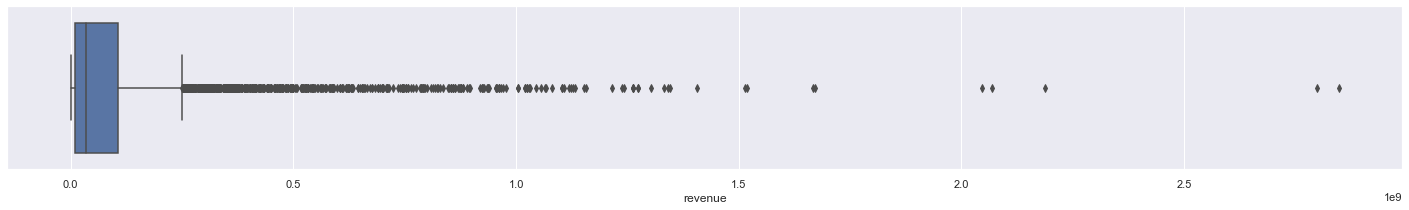

In [7]:
#display revenue in boxplot
fig, ax1 = plt.subplots(figsize=(25,3))
sns.boxplot(x='revenue', data=df)

Here we see that there are only high-end outliers in revenue, so let us remove them.

In [8]:
#calculate Interquartile Range to be used for eliminating outliers.
# anything below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3, IQR, lower_bound, upper_bound)

8998401.0 105867278.0 96868877.0 -136304914.5 251170593.5


Now let us create a new dataframe and visualize revenue.

<AxesSubplot:xlabel='revenue', ylabel='Count'>

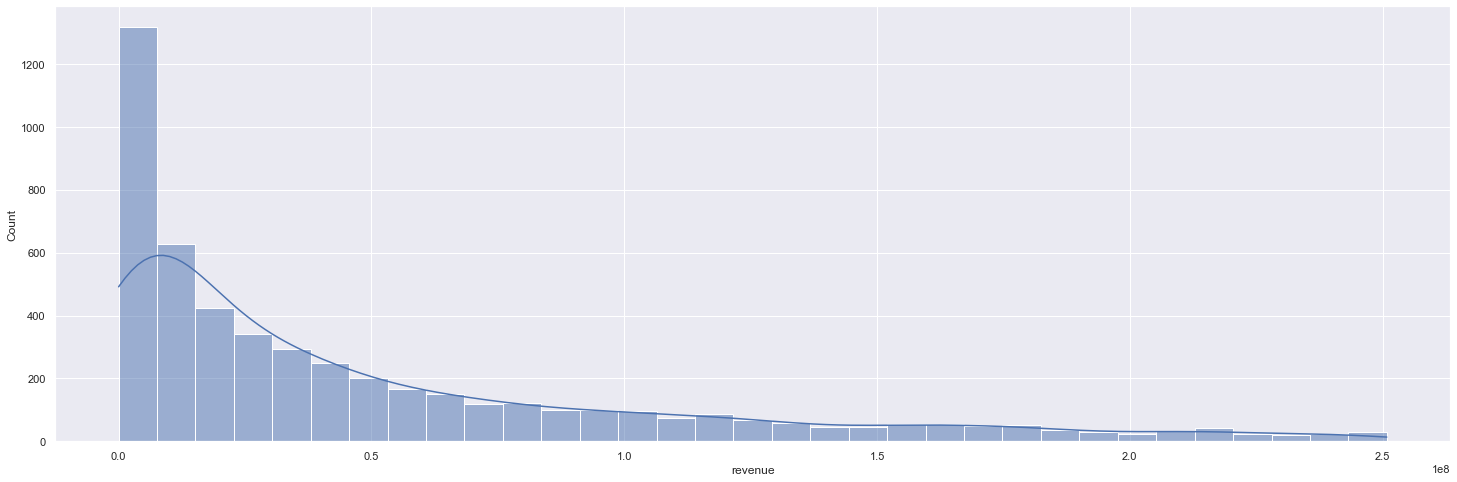

In [9]:
#create a new dataframe called "df_sub" that contains only movies with non-outlier revenues and display in a histogram
df_sub = df[df['revenue'] <= upper_bound]
sns.histplot(x='revenue', data=df_sub, kde=True)

Now that we have eliminated outliers in Revenue, let us begin our Exploratory Data Analysis. Note that when we visualize our data we will be using our original dataframe (df) and our dataframe without outliers in revenue (df_sub) to examine any significant changes to relationships in our data.

### Content Rating

Let's take a look at content rating and see which one tends to make the highest revenue. The possible content ratings are G, PG, PG-13, R, NR, and NC-17.

<AxesSubplot:xlabel='content_rating', ylabel='revenue'>

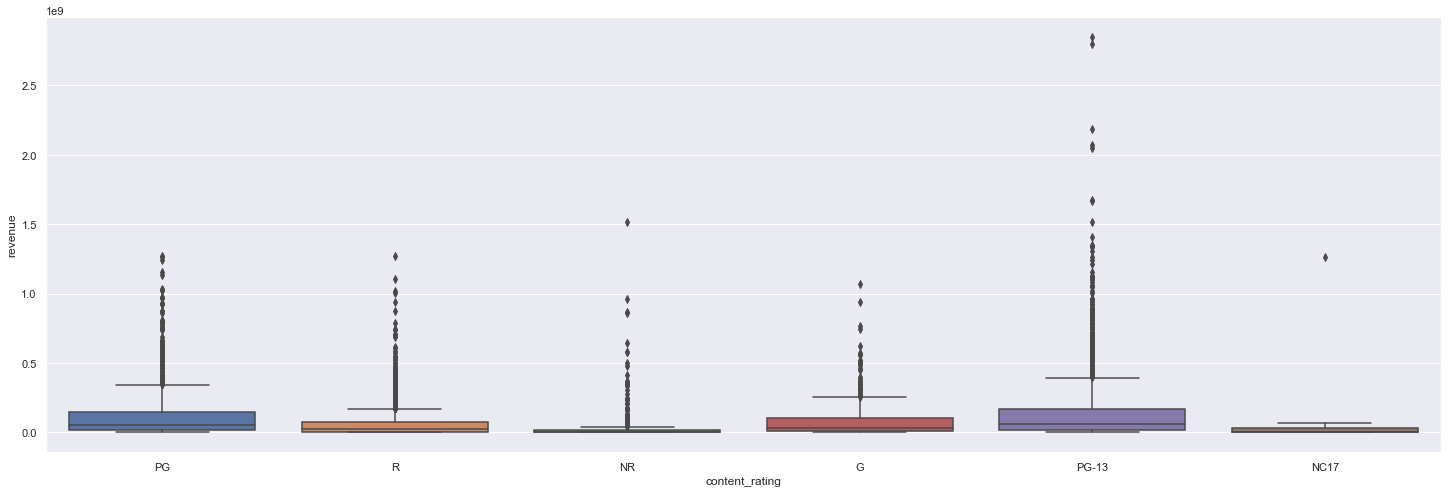

In [10]:
# create a boxplot with content rating and revenue
sns.boxplot(x='content_rating', y = 'revenue', data = df)


With this graph, we can see that the movie with the highest revenue is rated PG-13. But that movie is an outlier - let's plot content rating against revenue with outliers removed.

<AxesSubplot:xlabel='content_rating', ylabel='revenue'>

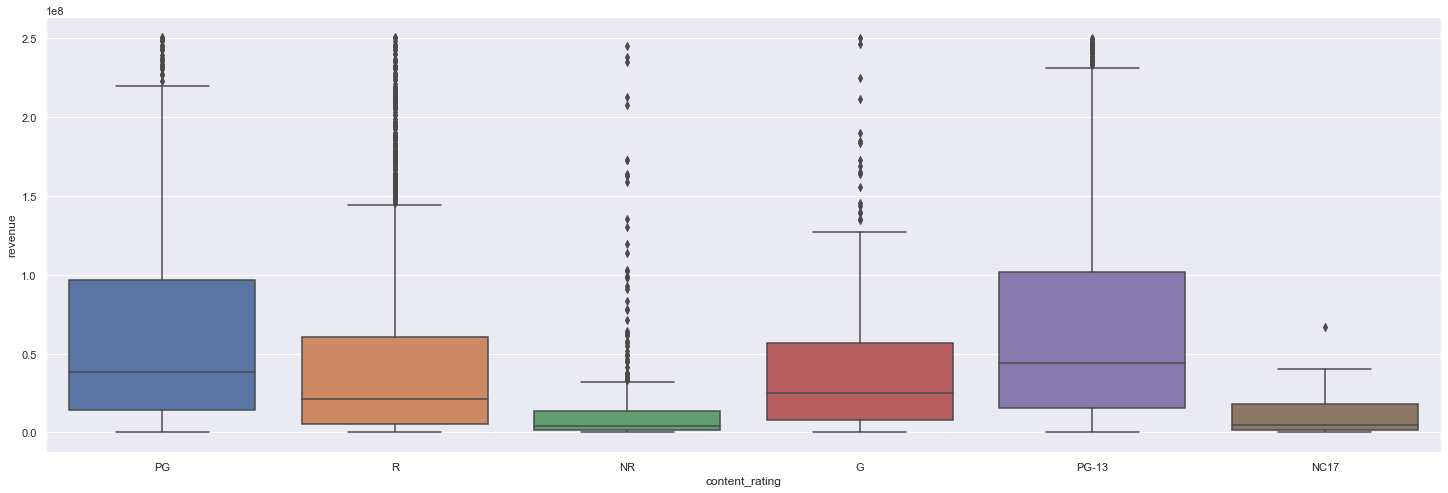

In [11]:
# create a boxplot with content rating and revenue without revenue outliers
sns.boxplot(x='content_rating', y = 'revenue', data = df_sub)

We can see that for revenue, on average, PG-13 movies have the highest median revenue, while NR movies have the lowest.

### Genre

The next variable we will take a look at is genre. We identified 21 different genres: action & adventure, comedy, drama, scifi, romance, classics, kids and family, art house and international, horror, mystery and suspense, animation, western, musical and performing arts, special interest, cult movies, television, sports and fitness, faith and spirituality, documentary, anime and manga, and gay and lesbian, and we will see which movies performed the best in revenue.

<AxesSubplot:xlabel='revenue', ylabel='genres'>

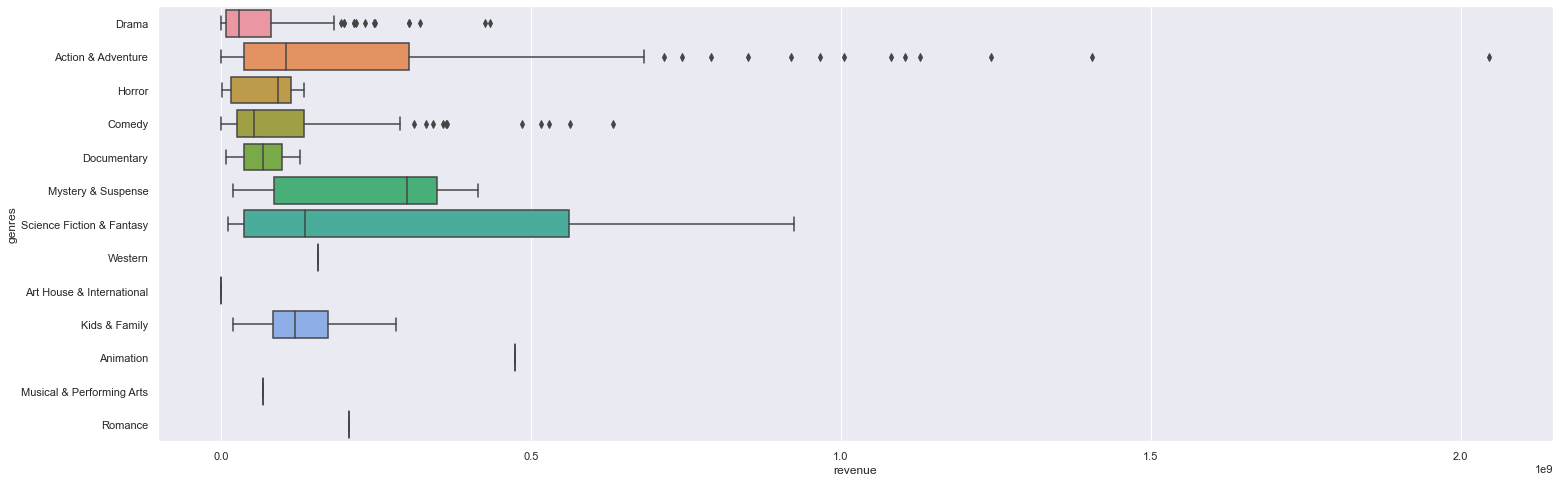

In [12]:
sns.boxplot(y='genres', x = 'revenue', data = df_all)

Based on these graphs, we can see that Action and Adventure have the movies with the largest revenues.

Let's examine this graph without the outliers in revenue.

<AxesSubplot:xlabel='revenue', ylabel='genres'>

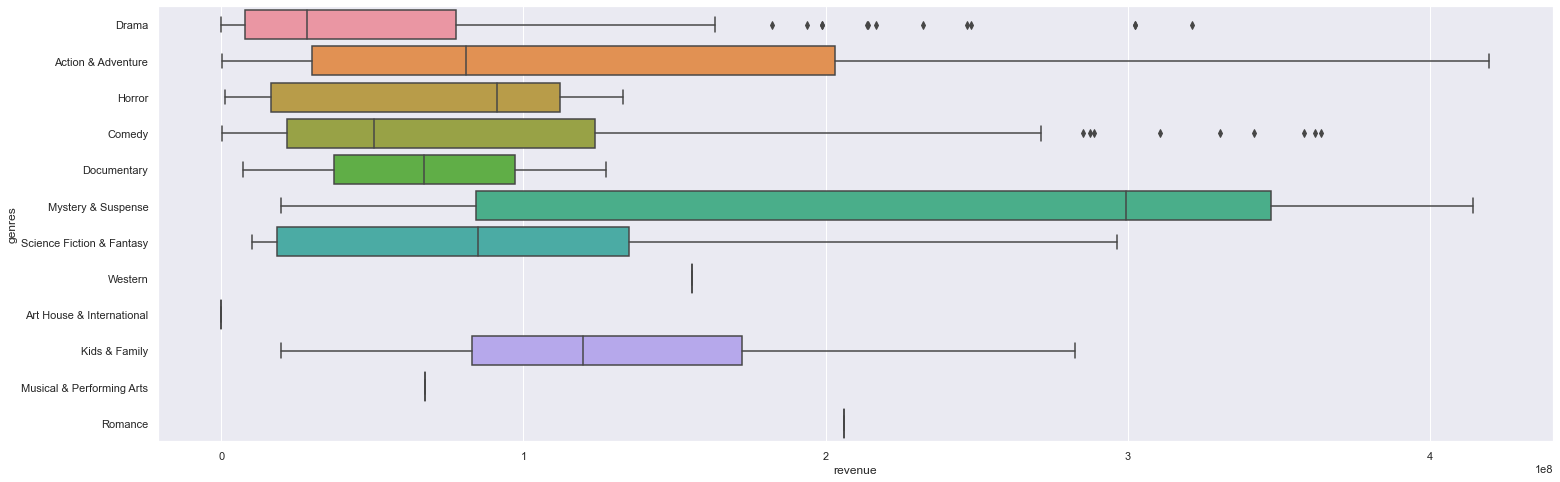

In [13]:
sns.boxplot(y='genres', x = 'revenue', data = df_sub_all)

This helps us see the graph in more detail. We can now see that the Animation genre has the highest median revenue, while Musical and Performing Arts has the lowest.

### Directors

Next, we will take a look at how the top directors perform in revenue, Tomatometer rating, and audience rating. These directors are the ones with the most movies in our list.

In [14]:
#Get a dataframe of only the top 10 directors' movies
directors = df['directors'].value_counts()[:10].index.tolist()
top_10_directors = df[df['directors'].isin(directors)]

<AxesSubplot:xlabel='revenue', ylabel='directors'>

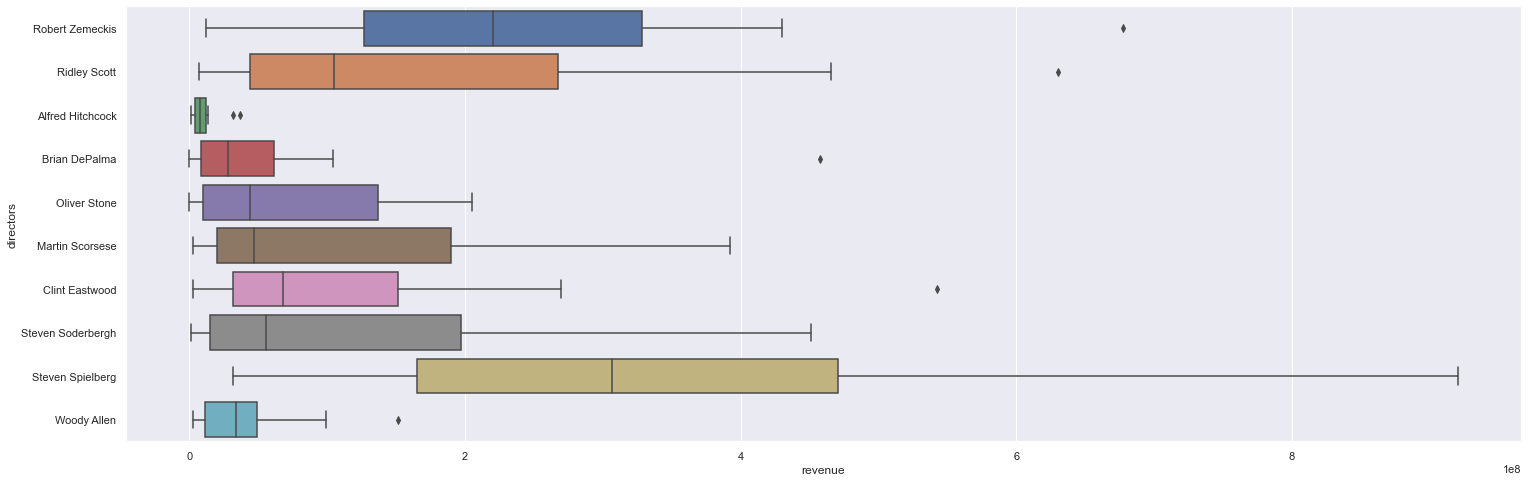

In [15]:
sns.boxplot(y='directors', x = 'revenue', data = top_10_directors)

Among the top directors, we can see that Stevel Spielberg tends to bring in the most revenue by a significant amount.

Next, let's take a look at the top 10 director's movies revenue but without outlier movies.

In [16]:
#Get a dataframe of only the top 10 directors' movies
directors_sub = df_sub['directors'].value_counts()[:10].index.tolist()
top_10_directors_sub = df_sub[df_sub['directors'].isin(directors)]

<AxesSubplot:xlabel='revenue', ylabel='directors'>

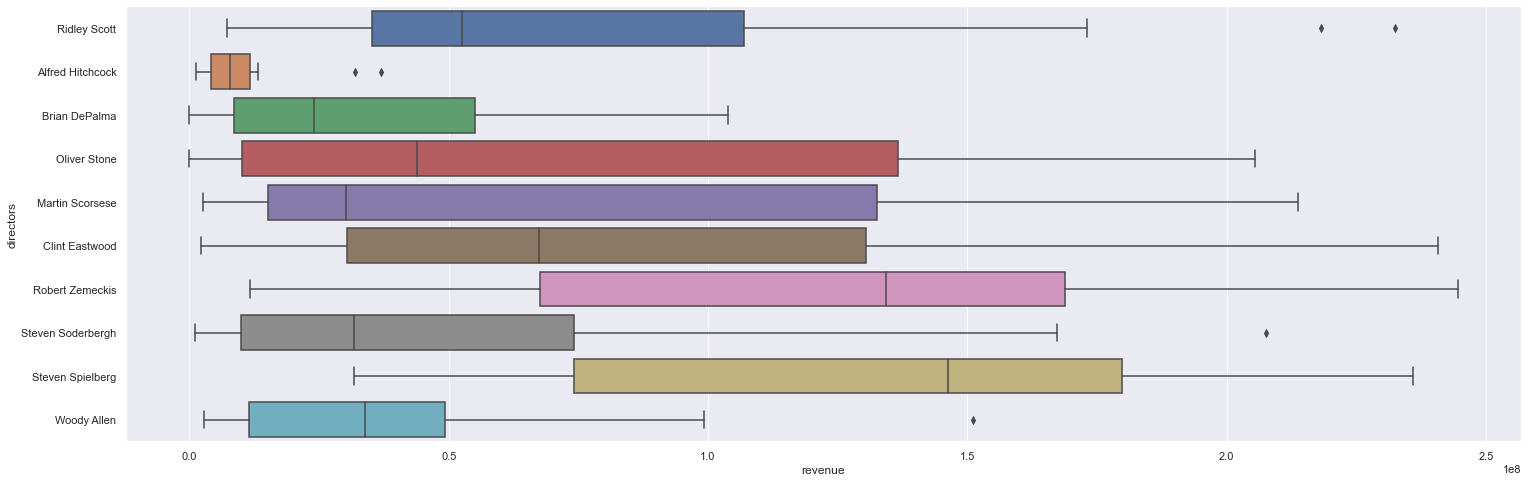

In [17]:
sns.boxplot(y='directors', x = 'revenue', data = top_10_directors_sub)

We can see that removing outliers is very bad when looking at top directors - Steven Spielberg disappears from the top 10 entirely, likely because a lot of his movies are very popular and outliers in revenue.

### Authors

One variable we seek to find a relationship with revenue is authors, or the value of reocurring authors for a given movie on rotten tomatoes. Since these are qualitative variables, we can create a dictionary to find the number of occurances for each author. Upon creating a dictionary, we can then order the list from greatest to least and further establish a box plot to see their relationship.

<AxesSubplot:xlabel='count', ylabel='authors'>

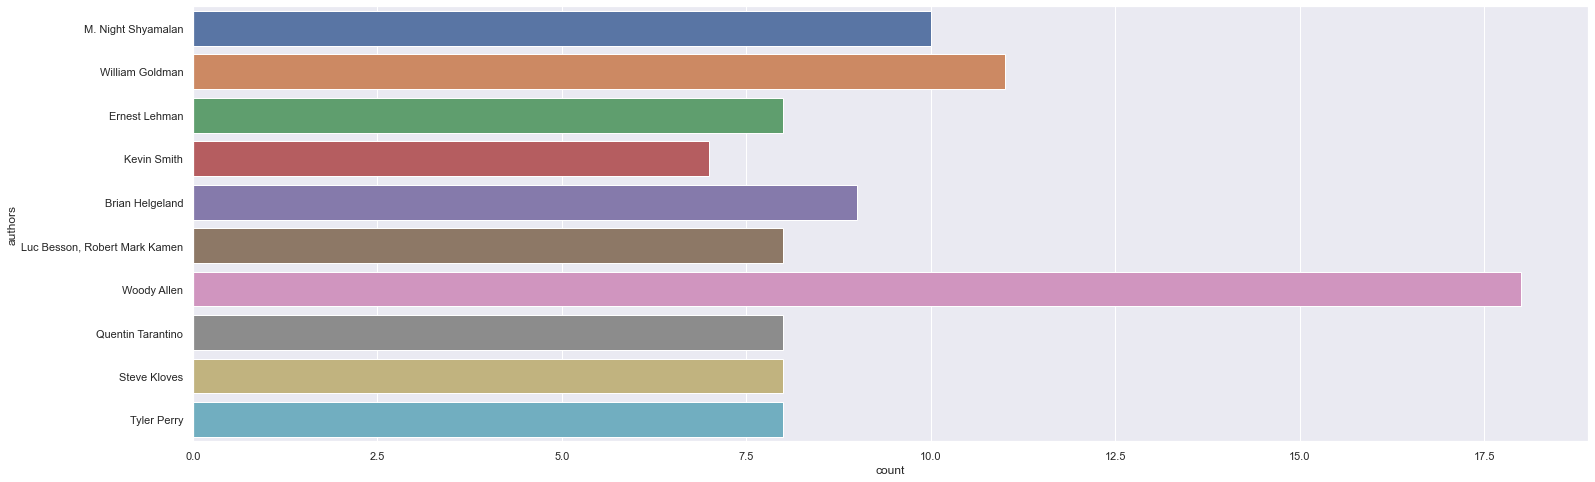

In [18]:
#Dictionary list of authors
authors_dict = {}
authors_list = [category for category in df['authors']]
for category in authors_list:
    for word in category.split(','):
        if word.strip() not in authors_dict:
            authors_dict[word.strip()] = 1
        else:
            authors_dict[word.strip()] += 1

#Sorts actors name from greatest to least occurance
marklist= sorted(authors_dict.items(), key=operator.itemgetter(1), reverse=True) 
sortdict=dict(marklist)

#Barplot for author count
authors = df['authors'].value_counts()[:10].index.tolist()
top_10_authors = df[df['authors'].isin(authors)]
sns.countplot(y = top_10_authors['authors'])

Now, let us sort the actors names from greatest to least occurance.

In [19]:
marklist= sorted(authors_dict.items(), key=operator.itemgetter(1), reverse=True) 
sortdict=dict(marklist)

Next, we will create a barplot for the author count

<AxesSubplot:xlabel='count', ylabel='authors'>

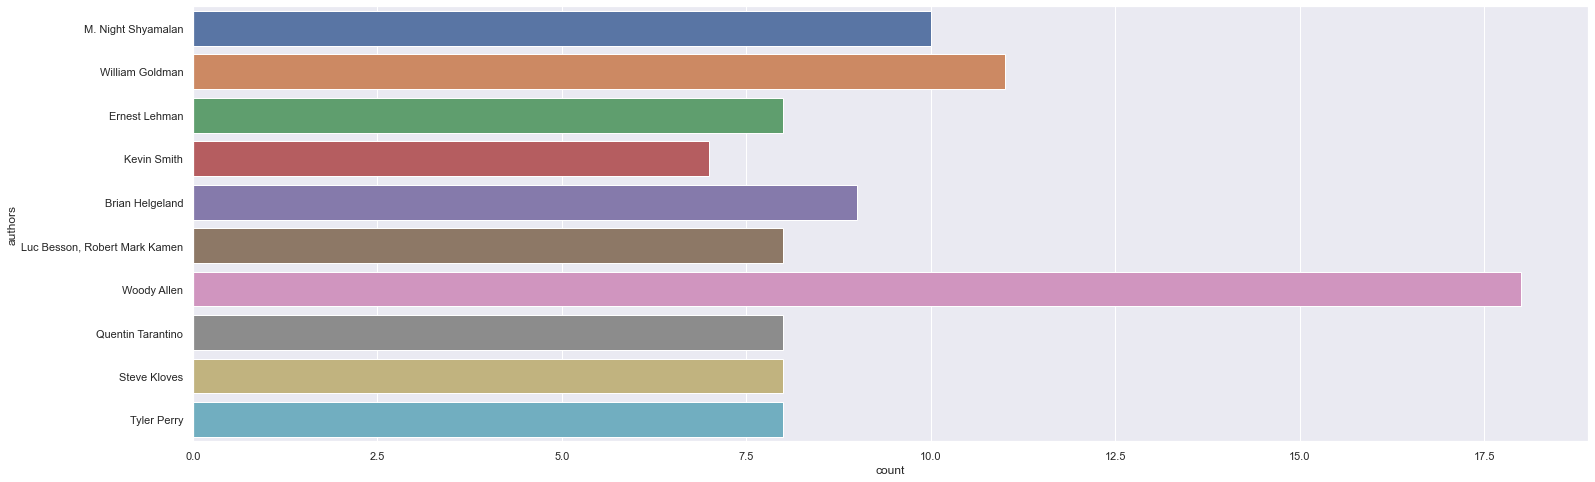

In [20]:
authors = df['authors'].value_counts()[:10].index.tolist()
top_10_authors = df[df['authors'].isin(authors)]
sns.countplot(y = top_10_authors['authors'])

<AxesSubplot:xlabel='revenue', ylabel='authors'>

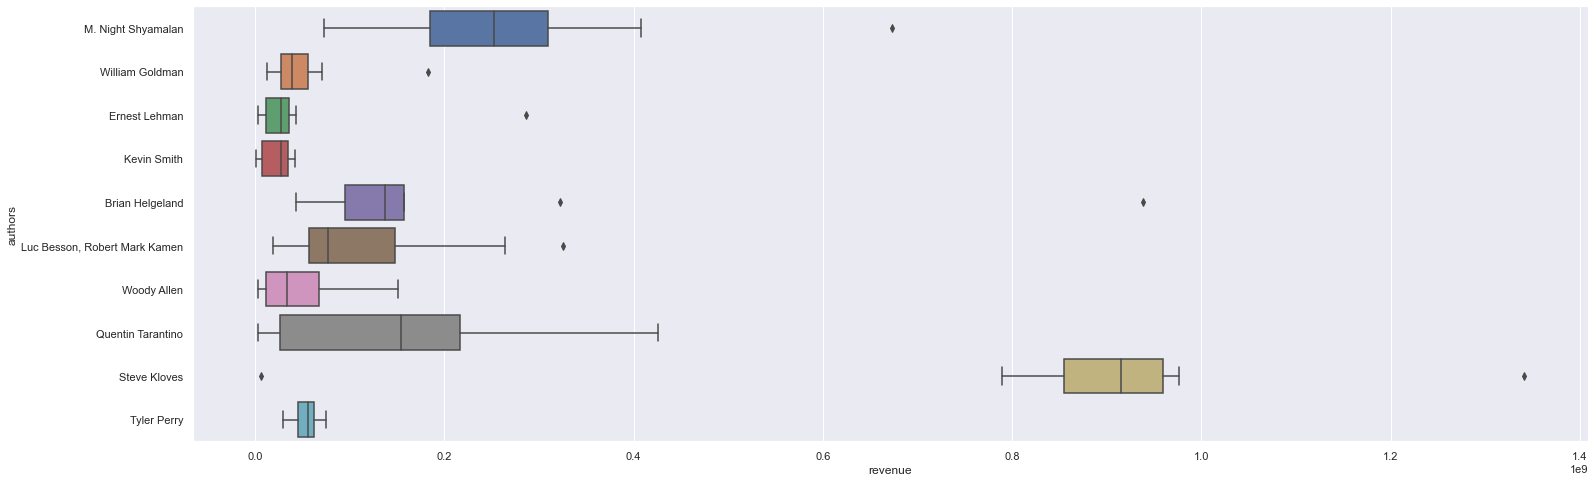

In [21]:
fig, axs = plt.subplots()
sns.boxplot(y='authors', x = 'revenue', data = top_10_authors)

From this box plot for authors above, we can see that William Goldman brought in the highest revenue while Ingmar Bergman brought in the lowest revenue. Steve Kloves had the highest mean value in comparison to all other authors in the top 10 list.

Now, we will be looking at the top 10 authors and their revenue without the outliers.

In [22]:
#Get a dataframe of only the top 10 actors' movies
authors_sub = df_sub['authors'].value_counts()[:10].index.tolist()
top_10_authors_sub = df_sub[df_sub['authors'].isin(authors)]

<AxesSubplot:xlabel='revenue', ylabel='authors'>

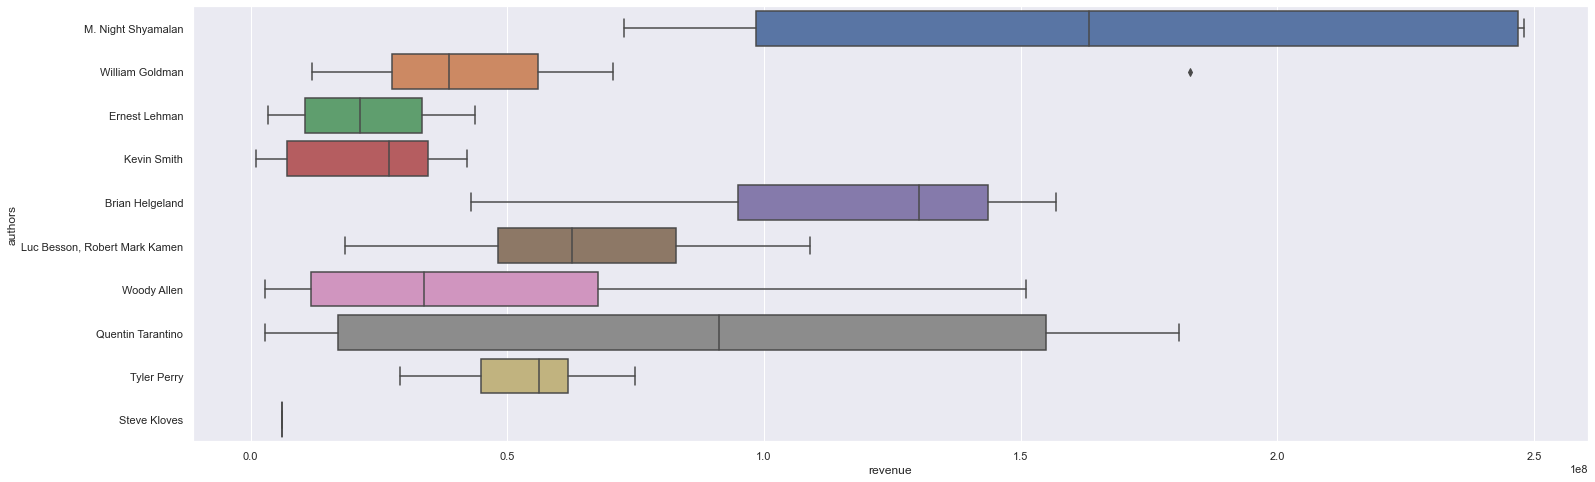

In [23]:
sns.boxplot(y='authors', x = 'revenue', data = top_10_authors_sub)

By eliminating the outliers in Revenue, we are able to see our data more clearly. We can clearly see that John Hughes had the highest median value while Werner Herzog had the lowest.

### Actors

Another variable we seek to find a relationship with revenue is actors, or the value of reocurring actors for a given movie on rotten tomatoes. Since these are qualitative variables, we can create a dictionary to find the number of occurances for each author. Upon creating a dictionary, we can then order the list from greatest to least and further establish a bar plot to see their relationship.

<AxesSubplot:xlabel='revenue', ylabel='actors'>

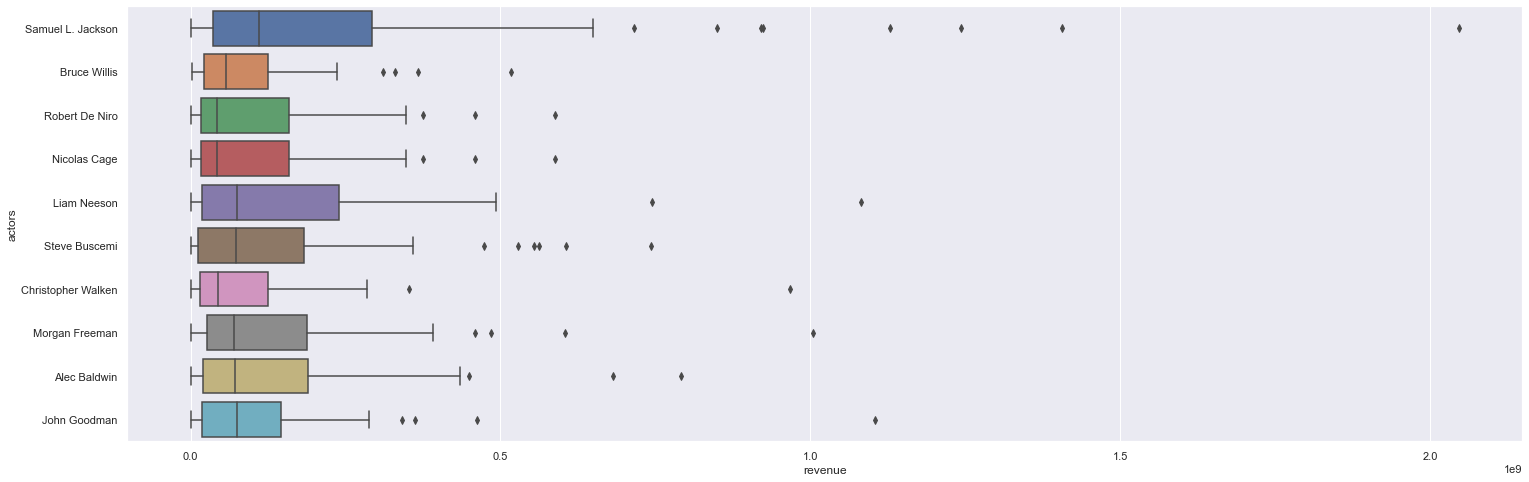

In [24]:
fig, axs = plt.subplots()
sns.boxplot(y='actors', x = 'revenue', data = df_all)

From the box plots, we can see that Samuel L. Jackson has the highest revenue while Christopher Walken has the lowest revenue. We will now look at this next graph without the outliers in revenue.

<AxesSubplot:xlabel='actors', ylabel='revenue'>

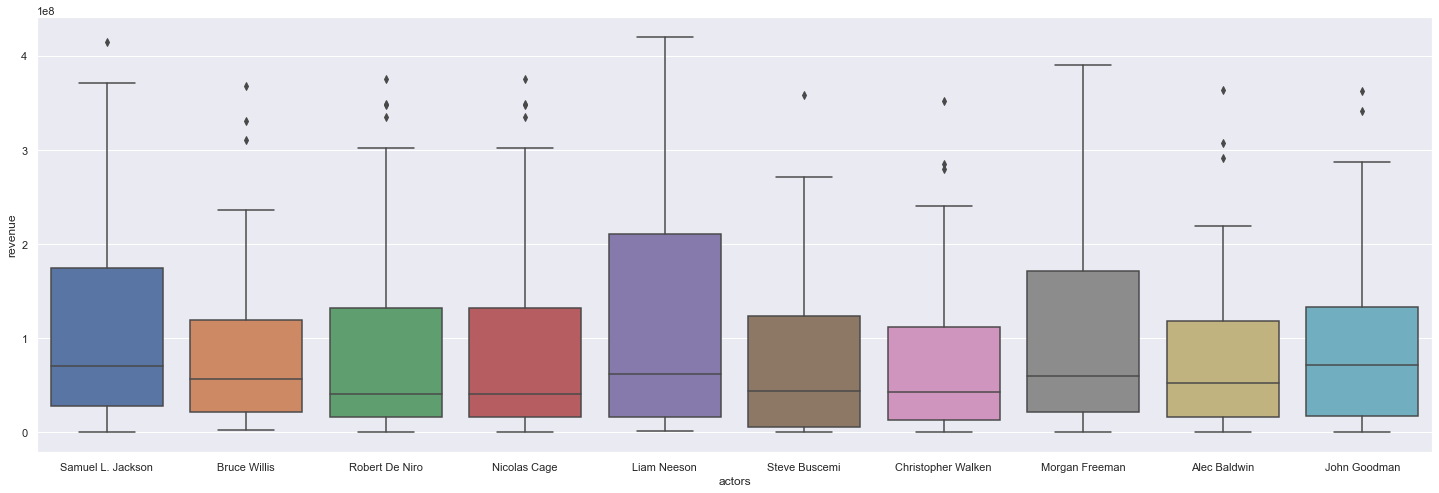

In [25]:
# create a boxplot with actors and revenue without revenue outliers
sns.boxplot(x='actors', y = 'revenue', data = df_sub_all)

### Original Release Date

The next variable we seek to find a relationship with revenue is release dates, or the date of release for a given movie on rotten tomatoes. Since these are quantitative variables, we can create a box plot 

<AxesSubplot:xlabel='count', ylabel='original_release_date'>

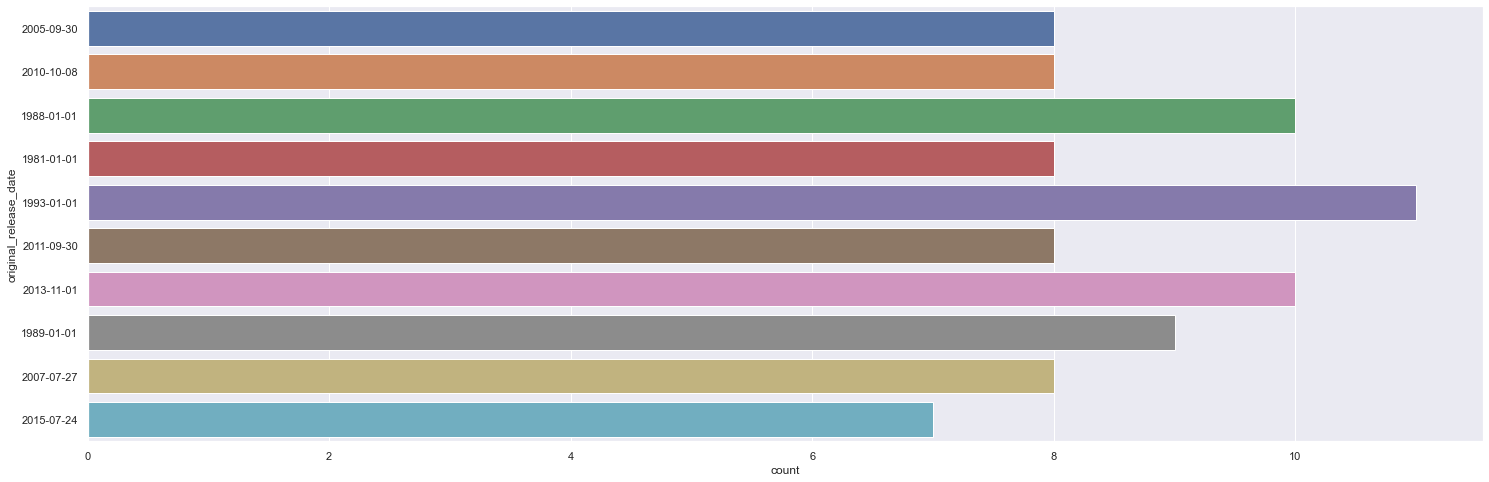

In [26]:
#Barplot for release date
original_release_date = df['original_release_date'].value_counts()[:10].index.tolist()
top_10_releasedate = df[df['original_release_date'].isin(original_release_date)]
sns.countplot(y = top_10_releasedate['original_release_date'])

Next, we will be creating a boxplot of original release dates.

<AxesSubplot:xlabel='revenue', ylabel='original_release_date'>

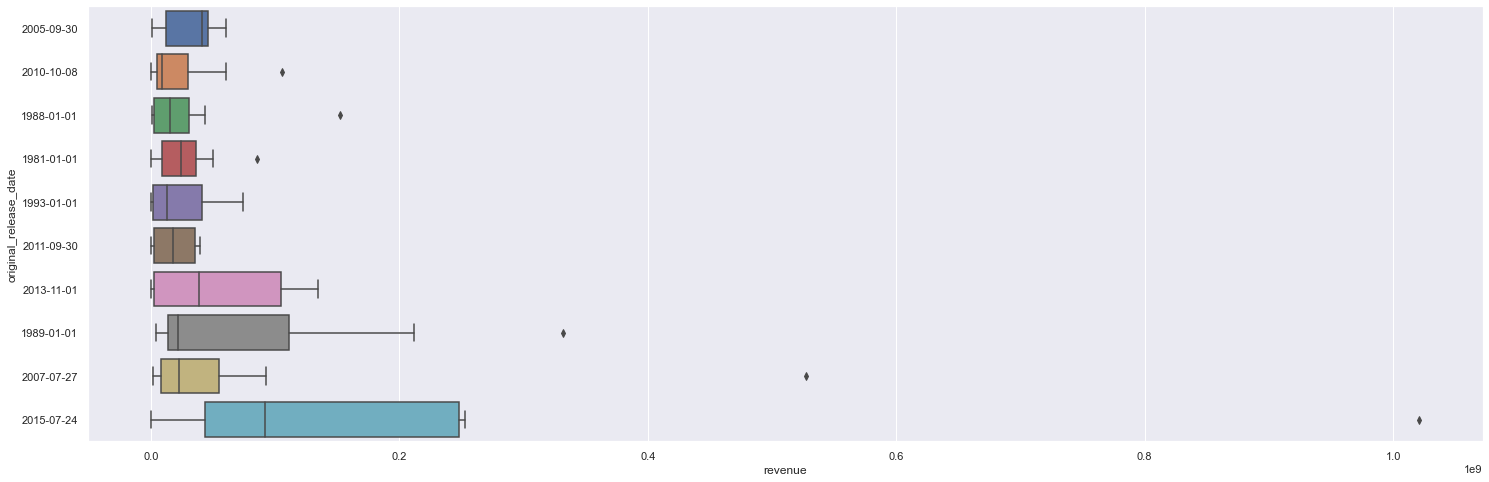

In [27]:
fig, axs = plt.subplots()
sns.boxplot(y='original_release_date', x = 'revenue', data = top_10_releasedate)

From the box plots above, we can see that the 2016-10-21 original release date had the highest revenue and 2003-01-01 with the lowest. While 2015-07-24 had the highest mean value.

Next, we are going to gather a dataframe with only the top 10 original release dates and then form a boxplot without outliers.

In [28]:
original_release_date_sub = df_sub['original_release_date'].value_counts()[:10].index.tolist()
top_10_original_release_date_sub = df_sub[df_sub['original_release_date'].isin(original_release_date)]

<AxesSubplot:xlabel='original_release_date', ylabel='revenue'>

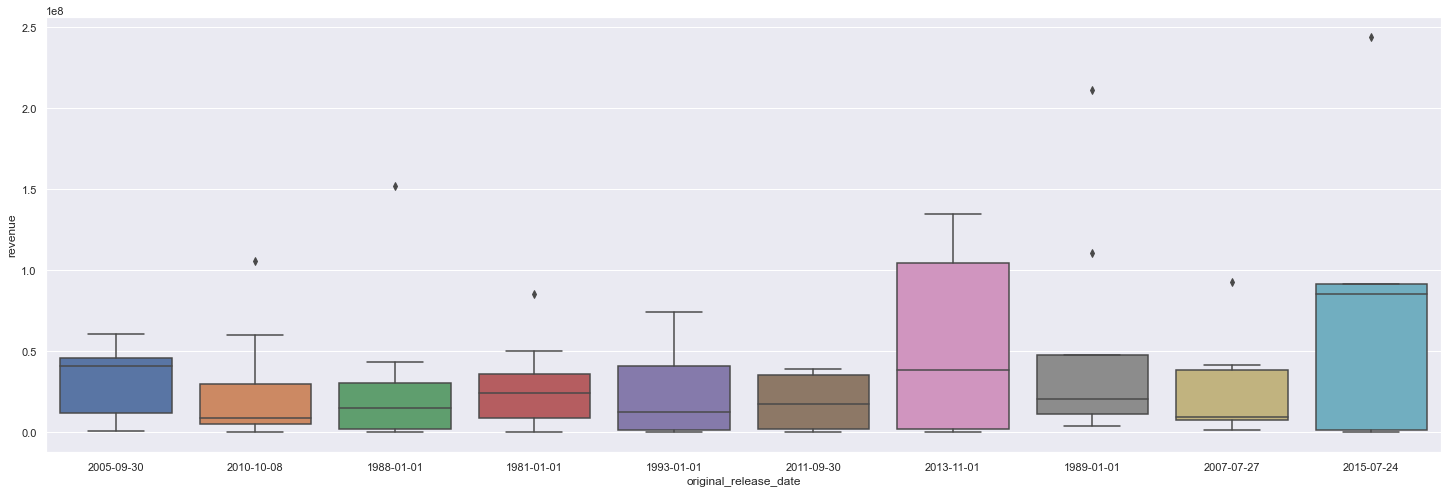

In [29]:
# create a boxplot with original release date and revenue without revenue outliers
sns.boxplot(x='original_release_date', y = 'revenue', data = top_10_original_release_date_sub)

In the boxplot above, we can see the original release date in comparison with revenue without the outliers from before. This boxplot allows us to see a more defined version of the graph with 2015-07-24 with the greatest mean value.

### Runtime, Production Company, and Tomatometer Rating

First we will look at some summary statistics of the runtime, production_company, tomatometer_rating to get a sense of the data

In [ ]:
print('Runtime Describe')
df['runtime'].describe()

Runtime Describe


count    5731.000000
mean      108.562206
std        19.661714
min        40.000000
25%        95.000000
50%       105.000000
75%       118.000000
max       254.000000
Name: runtime, dtype: float64

In [ ]:
print('production_company Describe')
df['production_company'].describe()

production_company Describe


count                      5731
unique                      778
top       Warner Bros. Pictures
freq                        370
Name: production_company, dtype: object

In [ ]:
print('tomatometer_rating Describe')
df['tomatometer_rating'].describe()

tomatometer_rating Describe


count    5731.000000
mean       56.666201
std        28.208333
min         0.000000
25%        32.000000
50%        60.000000
75%        82.000000
max       100.000000
Name: tomatometer_rating, dtype: float64

Out of all these summary statistics, some notable things to mention is the mean and median for both runtime and tomatometer_rating are relatively close to each other and the production_company variable has many unique production companies.

Next we will be graphing the variables to get a visual on the distributions

### Runtime

We first made a histoplot to count our runtime.

<AxesSubplot:xlabel='runtime', ylabel='Count'>

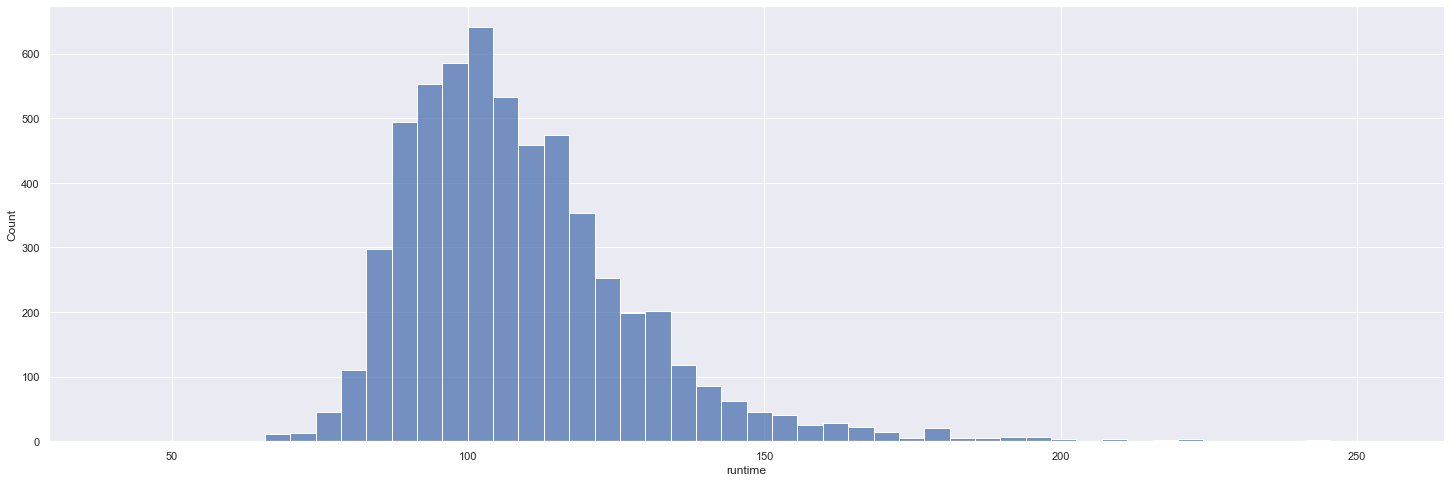

In [30]:
sns.histplot(data = df, x='runtime', bins = 50)

Through these graphs showing the distributions the runtime has a normal distribution. The top production companies by frequency appear to be Warner Bros Pictures, Universal Pictures and 20th Century Fox. These make sense as they are all one of the biggest production companies today. The tomatometer_rating graph is interesting as it is relatively flat until the ratings get higher then drops off. This could be something to do with good movies having more people rate them as more people watch them. The drop off towards the 100 could just be that less people give near perfect scores.

Next, let's look at production comapny.

### Production Company

We first made a bar plot of value counts for production companies.

Text(0, 0.5, 'Count')

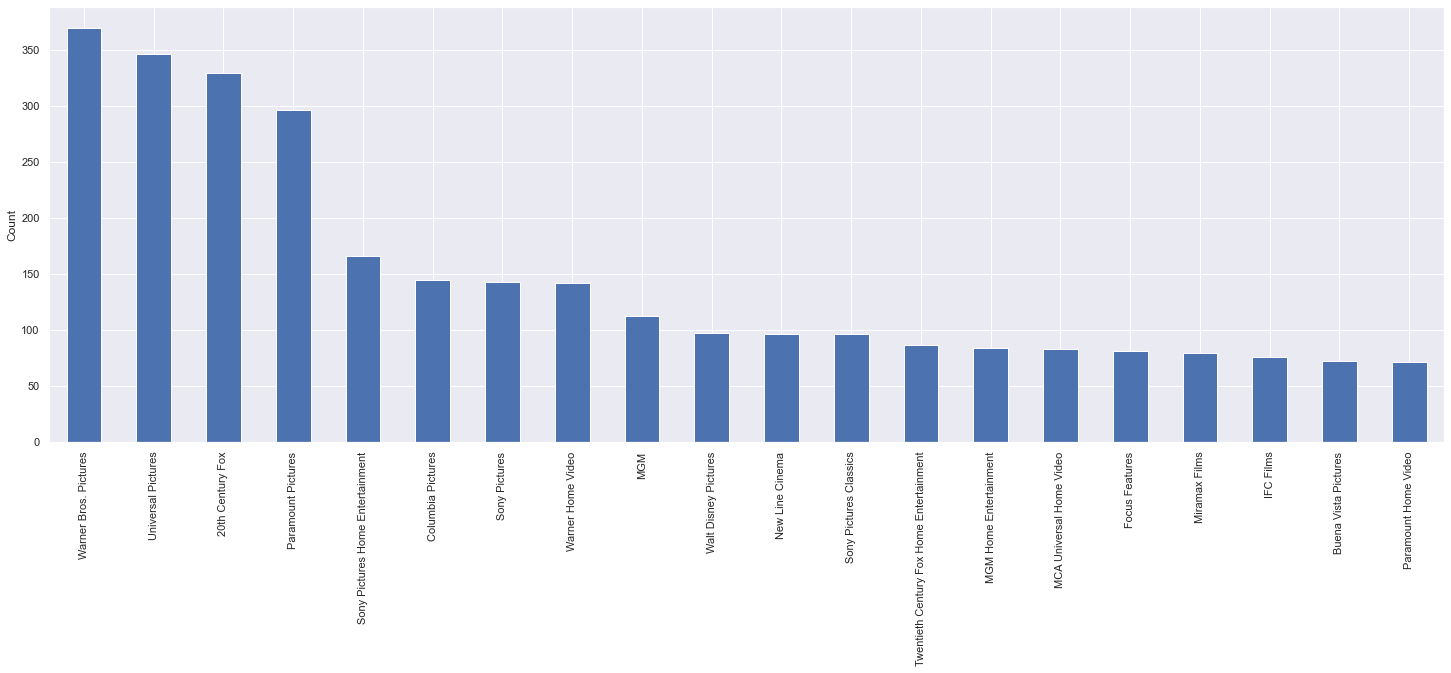

In [31]:
tPC = df['production_company'].value_counts()[:20].plot.bar()
tPC.set_ylabel('Count')

Next, we created a bar plot with a comparison of the average revenue with production company.

Text(0, 0.5, 'Average Revenue')

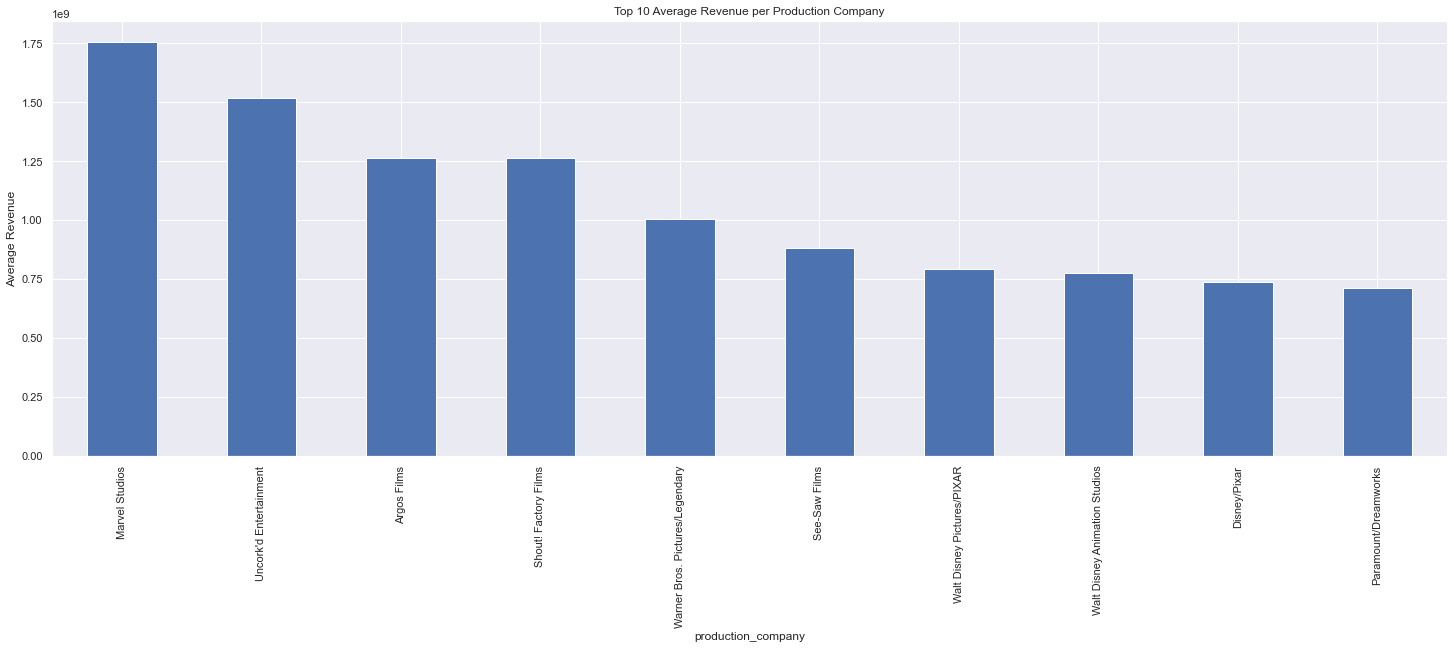

In [32]:
average_production_company_rev = df.groupby('production_company').mean()['revenue'].sort_values(ascending = False)
aRPC = average_production_company_rev[:10].plot.bar(title = 'Top 10 Average Revenue per Production Company')
aRPC.set_ylabel("Average Revenue")

From the bar graph above comparing the average revenue per production company we can that all the big studios produced many films with higher revenues. This is interesting to note as the bigger or the popular the studio is seem to have high revenues.

Next, let's look at tomatometer rating!

### Tomatometer Rating

First, we started by making a histplot of tomatometer ratings.

<AxesSubplot:xlabel='tomatometer_rating', ylabel='Count'>

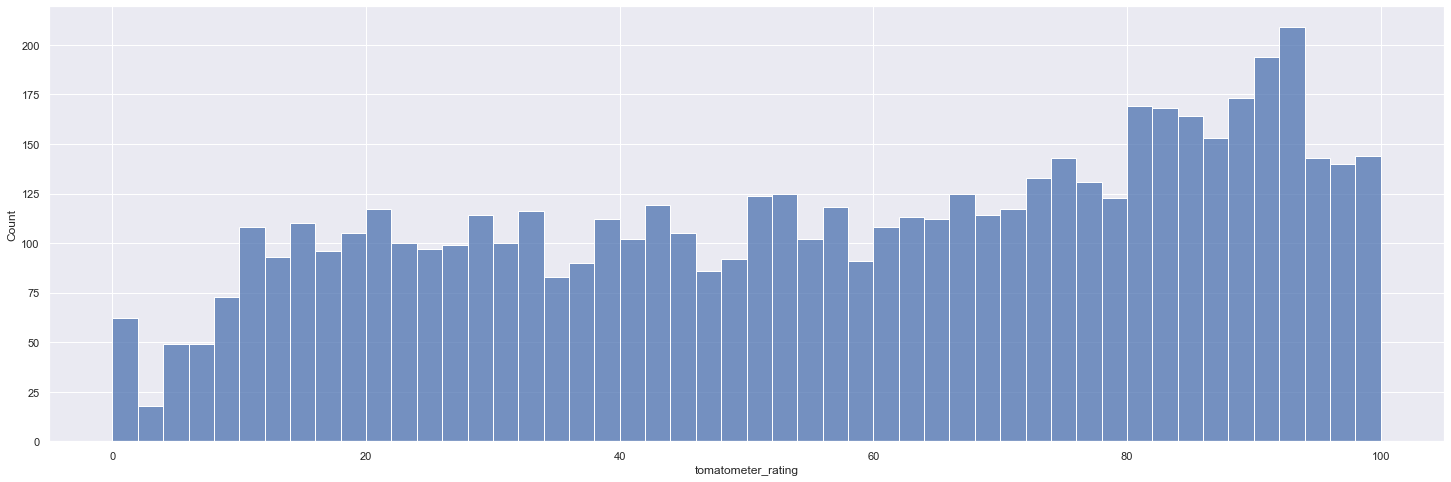

In [33]:
sns.histplot(data = df, x='tomatometer_rating', bins = 50)

Through these graphs showing the distributions the runtime has a normal distribution. The top production companies by frequency appear to be Warner Bros Pictures, Universal Pictures and 20th Century Fox. These make sense as they are all one of the biggest production companies today. The tomatometer_rating graph is interesting as it is relatively flat until the ratings get higher then drops off. This could be something to do with good movies having more people rate them as more people watch them. The drop off towards the 100 could just be that less people give near perfect scores.

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

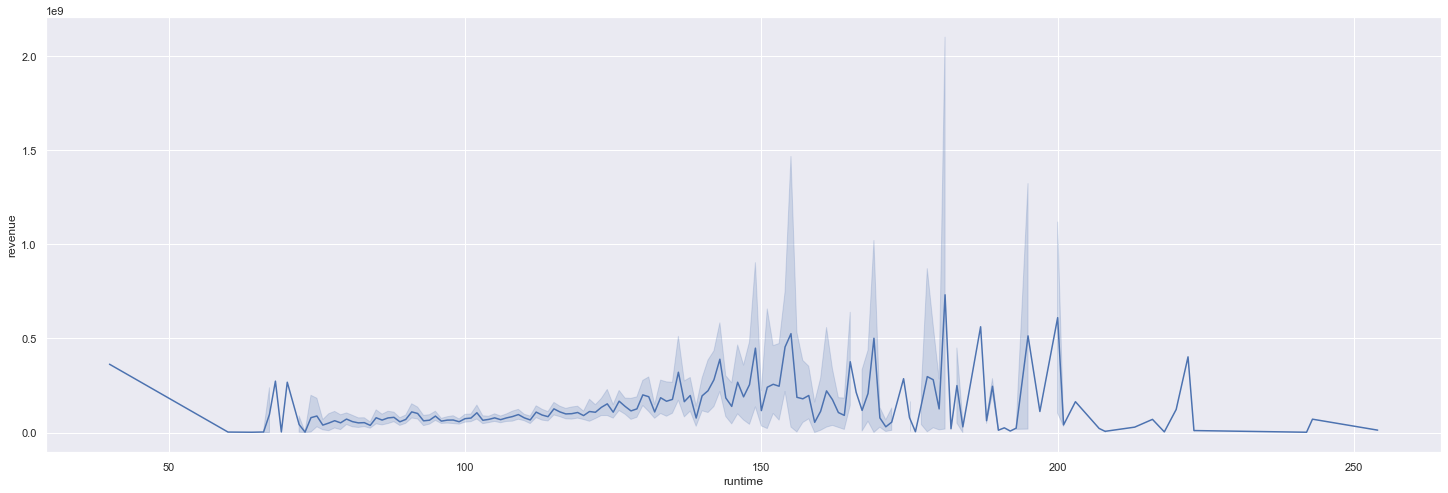

In [34]:
sns.lineplot(data = df, x='runtime', y='revenue')

The graph above of runtime on revenue show that there are some outliers with really low runtime and high runtimes however, there does not seem to be much of a relationship between the two.

Text(0, 0.5, 'Average Revenue')

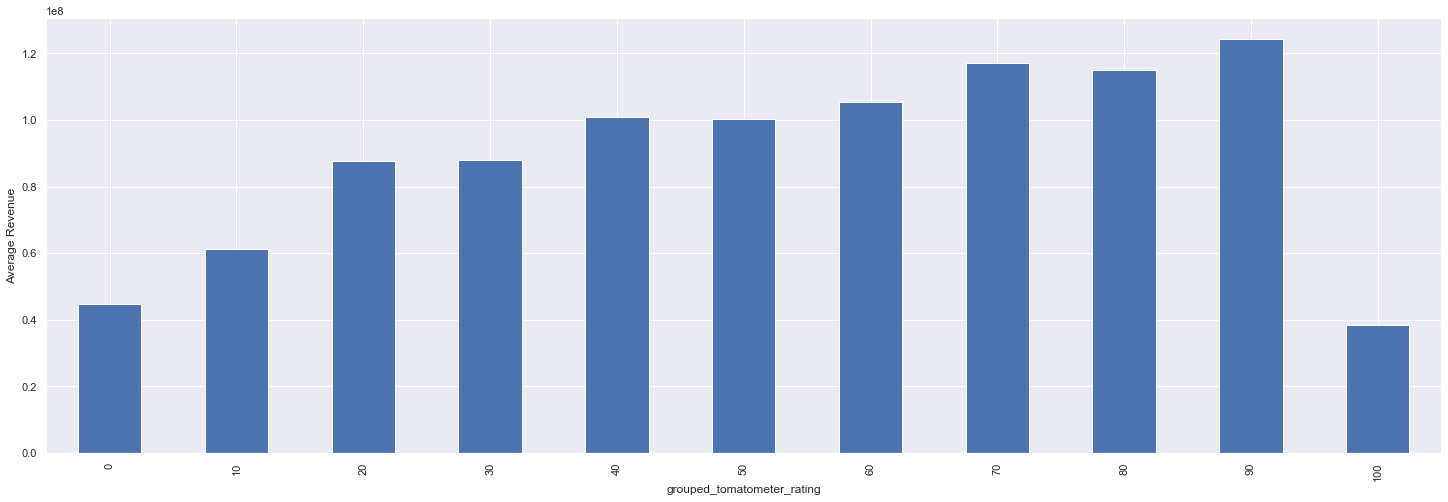

In [35]:
df2 = df.assign(grouped_tomatometer_rating = [int(x/10)*10 for x in df['tomatometer_rating']])
avg_tomatometer_rating = df2.groupby('grouped_tomatometer_rating').mean()['revenue']
aTR = avg_tomatometer_rating.plot.bar()
aTR.set_ylabel('Average Revenue')

The bar graph shows the average revenue for each bucket of 10 points in tomatorating and shows a postive trend of more revenue the higher the rating is then a drop off at 100. The 100 is most likely due to not as popular movies that score really well with a niche audience so it does not have a high revenue or movies which only a couple reviews with high ratings.

### Tomatometer Count
Does the tomatometer count (number of critic ratings for a movie on rotten tomatoes) affect a movie's revenue?\
We start by creating a sub dataframe called "tm_count" that only contains the Tomatometer Count and Revenue variables from our original dataframe to make things easier for us.

In [36]:
#create new dataframe "tm_count" containing only Tomatometer Count and Revenue
tm_count = df[['tomatometer_count', 'revenue']]
tm_count

,tomatometer_count,revenue
0,149.0,226497209
1,24.0,74865517
2,54.0,1000000
3,27.0,28200000
4,15.0,49483352
...,...,...
5726,138.0,60780981
5727,232.0,55969000
5728,68.0,12506188
5729,291.0,1023784195


Now let us visualize our Tomatometer Count variable in a histogram.

<AxesSubplot:xlabel='tomatometer_count', ylabel='Count'>

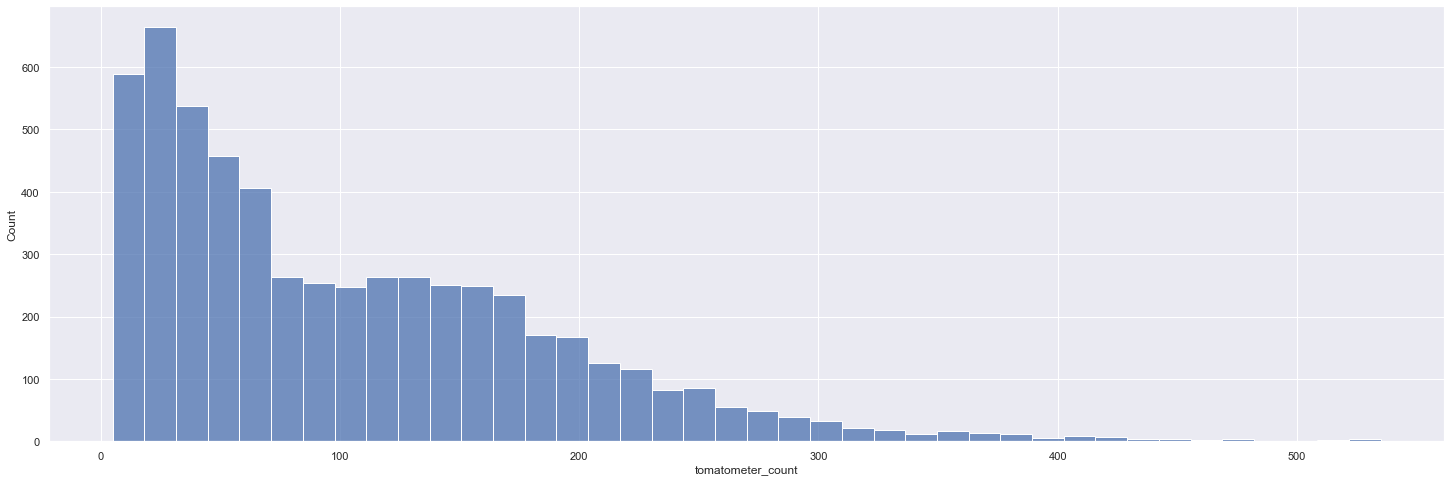

In [37]:
#display Tomatometer Count in histogram
sns.histplot(x='tomatometer_count', data=tm_count)

Then, we can plot Tomatometer Count against Revenue to see their relationship.

[Text(0.5, 0, 'Tomatometer Count'), Text(0, 0.5, 'Revenue')]

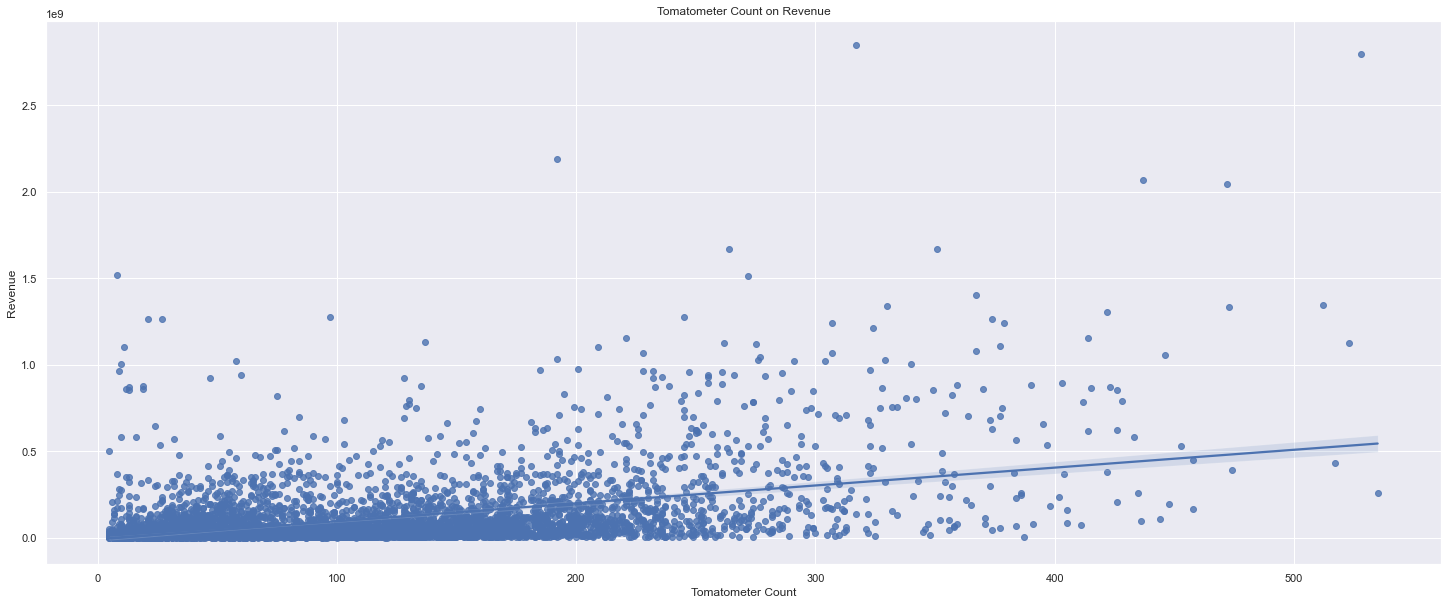

In [38]:
#generate linear regression plot of Tomatometer Count vs Revenue
fig, ax1 = plt.subplots(figsize=(25,10))
sns.regplot(ax=ax1, x='tomatometer_count', y='revenue', data=tm_count)
ax1.set_title('Tomatometer Count on Revenue')
ax1.set(xlabel='Tomatometer Count', ylabel='Revenue')

What a mess! We see that there may be a positive relationship between Tomatometer Count and a movie's Revenue, but it does not seem like a linear regression model matches our data. Let's try to condense our "tm_count" dataframe by removing outliers in Tomatometer Count and grouping movies together by their Tomatometer Counts and taking the mean of their revenues to generate one datapoint. Hopefully this will create a plot better suited for linear regression.

#### Removing Outliers in Tomatometer Count
Let's look back at our Tomatometer Count's distribution.

<AxesSubplot:xlabel='tomatometer_count', ylabel='Count'>

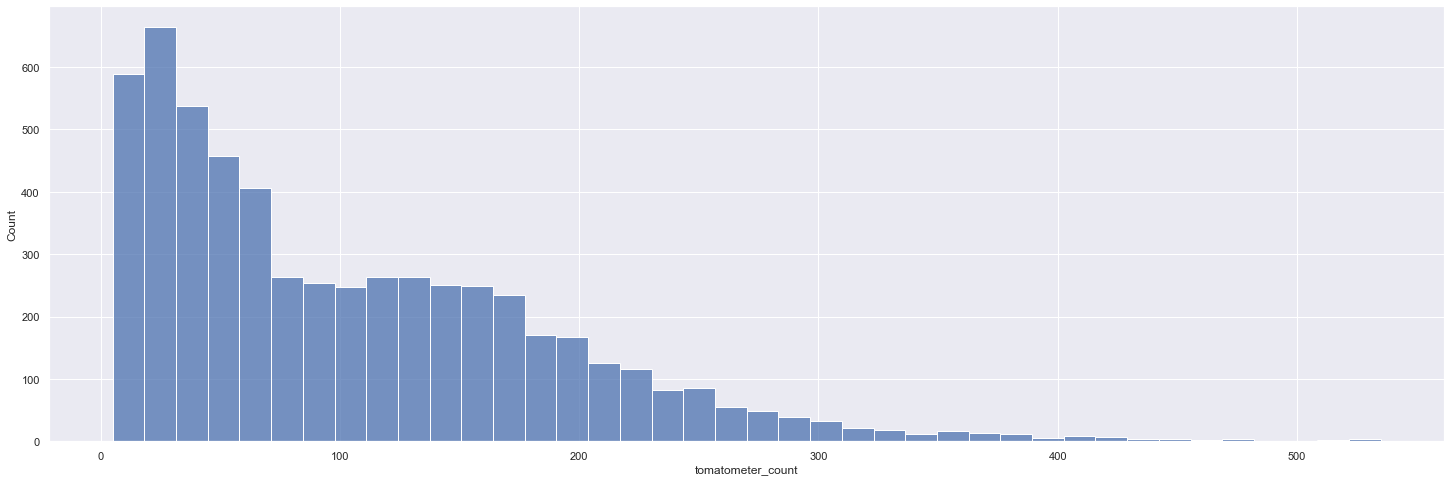

In [39]:
sns.histplot(x='tomatometer_count', data=tm_count)

We see that it is heavily skewed to the right, meaning there is a possibility of there being high-end outliers in this variable. Let's generate a boxplot to look for them.

<AxesSubplot:xlabel='tomatometer_count'>

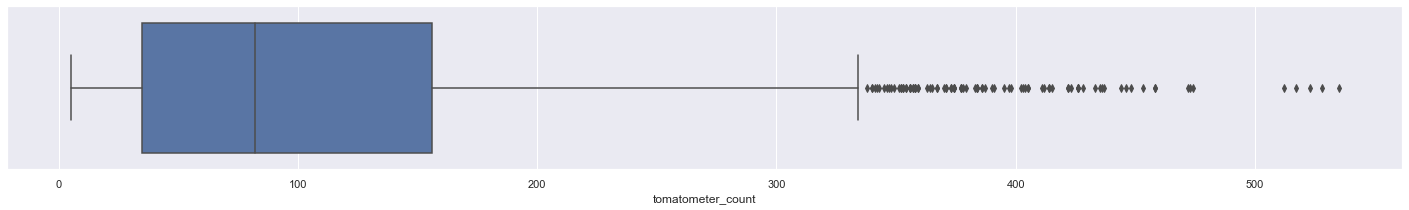

In [40]:
#generate boxplot for Tomatometer Count
plt.figure(figsize=(25,3))
sns.boxplot(x='tomatometer_count', data=tm_count)

From the boxplot above, it is evident that there are a substantial amount of high-end outliers in Tomatometer Count and no low-end outliers. Let's remove these outliers so we can identify differences in the distribution of Tomatometer Count with and without outliers. Furthermore, we will also remove outliers in revenue.

In [41]:
#remove outliers in revenue from tm_count first
tm_no_outliers = df_sub[['tomatometer_count', 'revenue']]

To remove outliers, we must calculate the Interquartile Range of our Tomatometer Count variable. Anything above the third quartile (Q3) + 1.5 * IQR is considered a high-end outlier.

In [42]:
#calculate the threshold for high-end outliers in Tomatometer Count
Q1 = tm_no_outliers['tomatometer_count'].quantile(0.25)
Q3 = tm_no_outliers['tomatometer_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3, IQR, upper_bound)

33.0 143.0 110.0 308.0


Now let us remove these outlier movies from our working dataset.

<AxesSubplot:xlabel='tomatometer_count', ylabel='Count'>

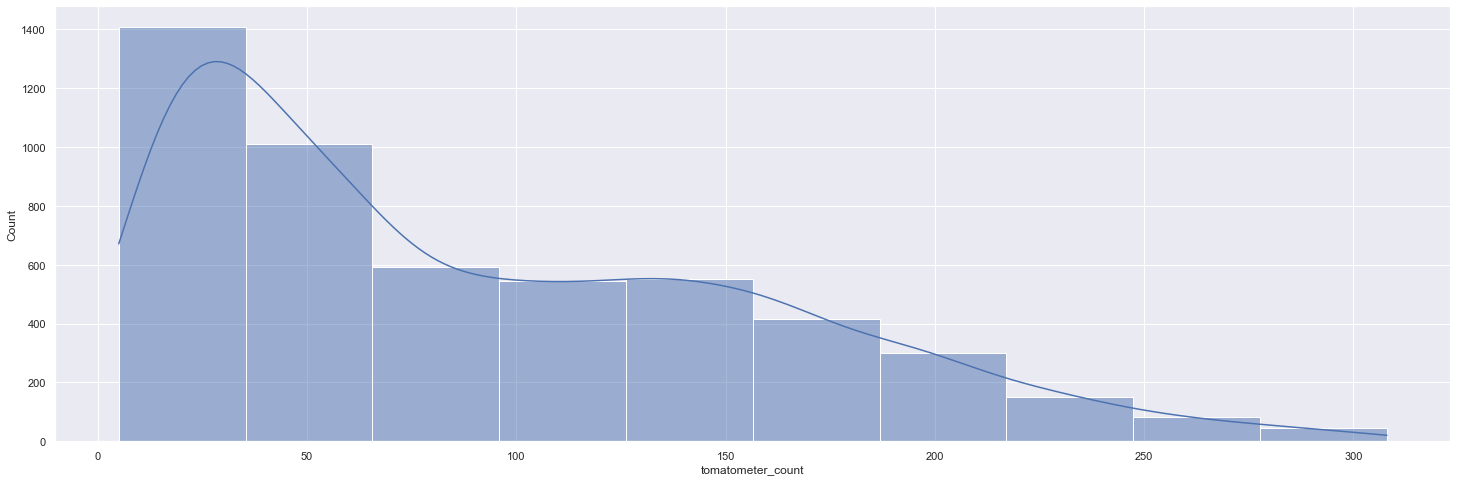

In [43]:
#remove high-end outliers from our dataset and display new distribution for Tomatometer Count
tm_no_outliers = tm_no_outliers[tm_no_outliers['tomatometer_count'] <= upper_bound]
sns.histplot(tm_no_outliers['tomatometer_count'], kde=True, bins=10)

After removing outliers, let's condense our data by grouping together movies with identical Tomatometer Counts. We will combine these movies into a single datapoint by taking the mean of their revenues.

In [44]:
#group movies together and display
tm_no_outliers = tm_no_outliers.groupby(['tomatometer_count']).mean()
tm_no_outliers = tm_no_outliers.reset_index()
tm_no_outliers

,tomatometer_count,revenue
0,5.0,9.088985e+06
1,6.0,1.666032e+07
2,7.0,2.085452e+07
3,8.0,1.787575e+07
4,9.0,1.772470e+07
...,...,...
290,304.0,1.731859e+08
291,305.0,9.407001e+07
292,306.0,1.735676e+08
293,307.0,1.028752e+08


We managed to to reduce our dataset down from 5150 rows to 295 rows. Now let's display the new linear regression model.

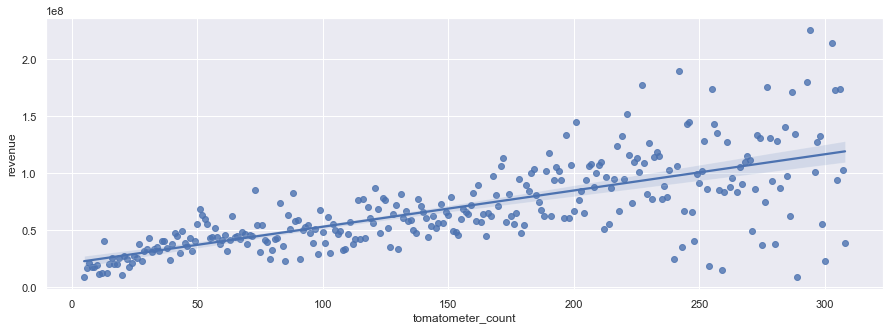

In [45]:
fig, ax1 = plt.subplots(figsize=(15,5))
sns.regplot(x='tomatometer_count', y='revenue', data=tm_no_outliers);

This looks a lot better! Our new dataset seems to fit a linear regression model a lot better than the previous one. Let's display the new and old linear regression models side-by-side to truly examine the difference.

[Text(0.5, 0, 'Tomatometer Count'), Text(0, 0.5, 'Revenue')]

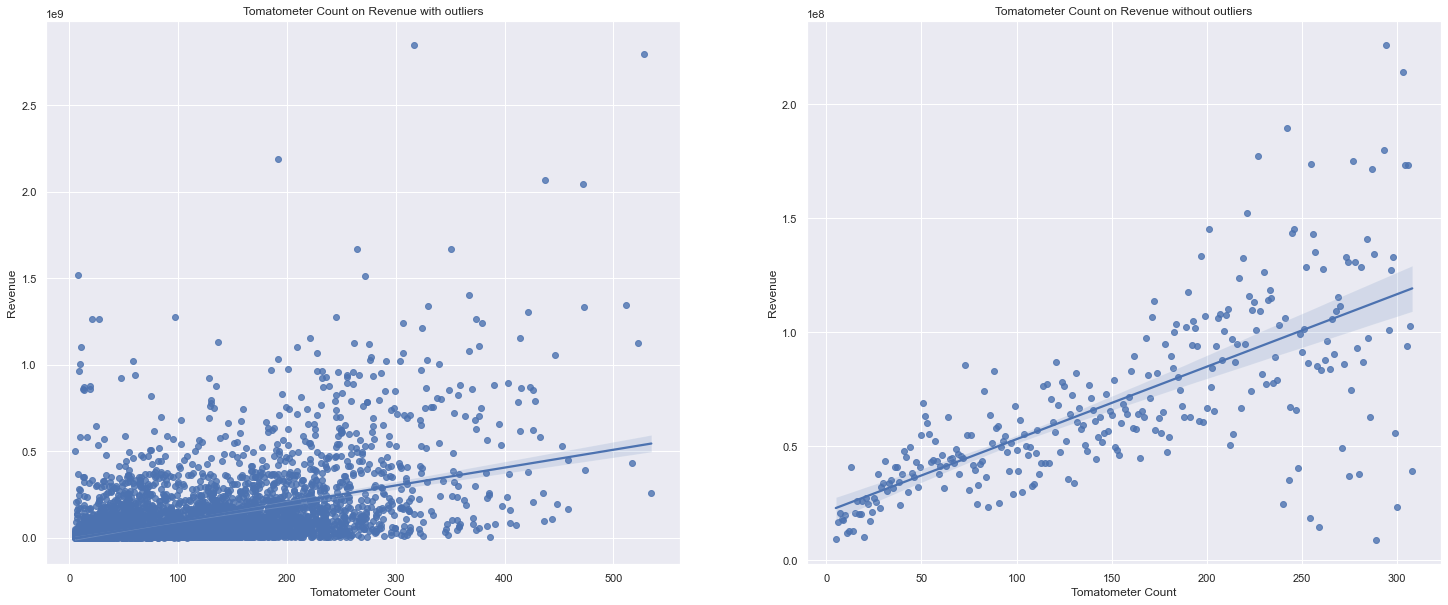

In [46]:
#display original Tomatometer Count vs Revenue model with outliers and without outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.regplot(ax=ax1, x='tomatometer_count', y='revenue', data=df)
ax1.set_title('Tomatometer Count on Revenue with outliers')
ax1.set(xlabel='Tomatometer Count', ylabel='Revenue')

sns.regplot(ax=ax2, x='tomatometer_count', y='revenue', data=tm_no_outliers)
ax2.set_title('Tomatometer Count on Revenue without outliers')
ax2.set(xlabel='Tomatometer Count', ylabel='Revenue')

While the dataset with removed outliers and grouped Tomatometer Counts looks a lot prettier than the dataset without, we believe the outliers to have significant importance in our analysis. Each "outlier" is an individual movie that cannot be removed from our data just because it has high revenue. For this reason, we will be performing our analysis with outliers later.

### Audience Rating

How does audience rating affect a movie's revenue? Let's take a look at this question by creating a sub dataframe and visualizing the relationship between the two variables.

In [47]:
#create dataframe containing only audience rating and revenue variables
aud_rating = df[['audience_rating', 'revenue']]
aud_rating.describe()

,audience_rating,revenue
count,5731.000000,5.731000e+03
mean,61.412842,9.915164e+07
std,20.012619,1.844640e+08
min,8.000000,1.000000e+00
25%,46.000000,8.998401e+06
50%,63.000000,3.441689e+07
75%,78.000000,1.058673e+08
max,100.000000,2.847246e+09


Let's take a look at the distribution of our audience rating variable.

<AxesSubplot:xlabel='audience_rating', ylabel='Count'>

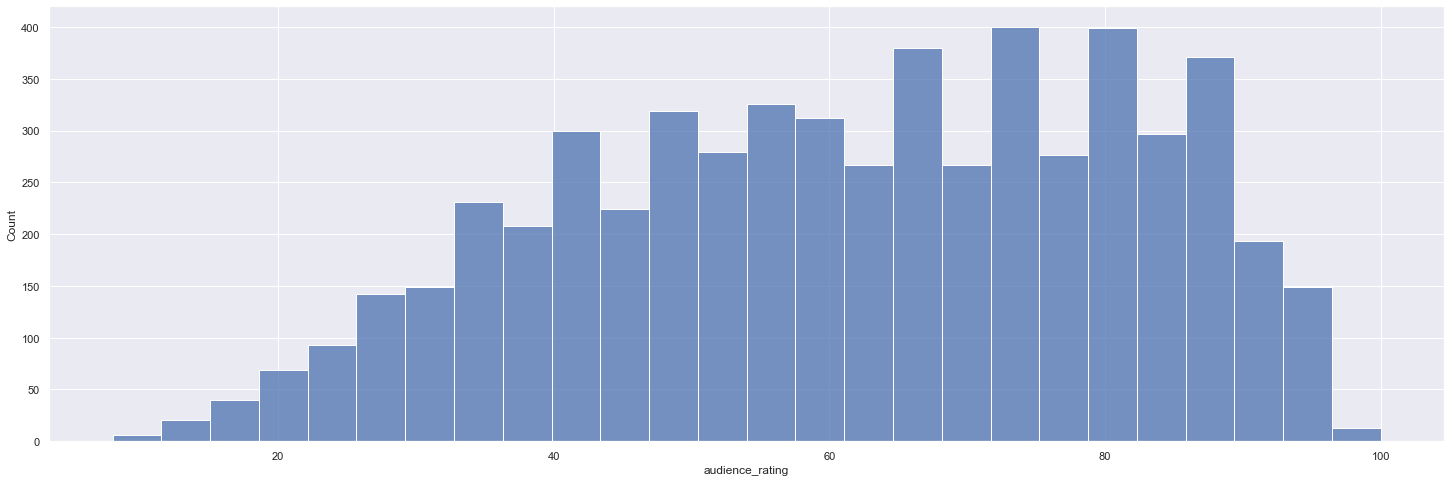

In [48]:
#display histogram of audience rating variable
sns.histplot(x='audience_rating', data=aud_rating)

As we can see from the graph above, audience_rating values range from 0 to 100. Now let's see the relationship between audince rating and revenue.

<AxesSubplot:xlabel='audience_rating', ylabel='revenue'>

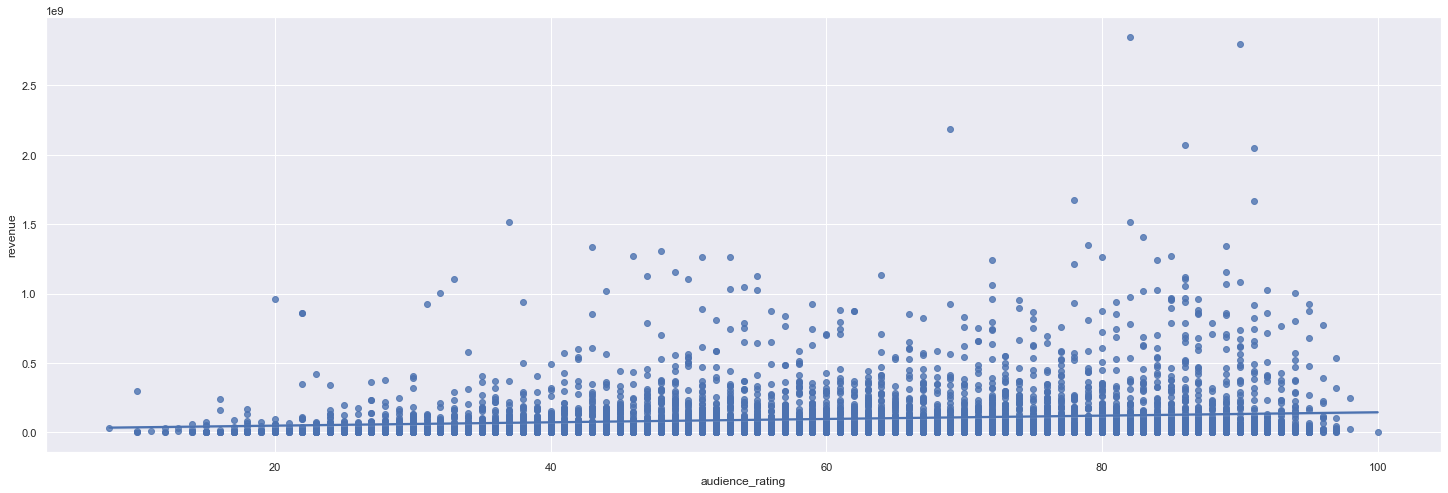

In [49]:
sns.regplot(x='audience_rating', y='revenue', data=aud_rating)

That's... hard to analyze. But what we do notice from this graph is that there are a lot of repeating audience rating values because they can only range from 0 to 100. Let's group movies together with the same audience rating and take the mean of their revenues to create one datapoint. Hopefully this will give us a clearer visual relationship between the two variables.

<AxesSubplot:xlabel='audience_rating', ylabel='revenue'>

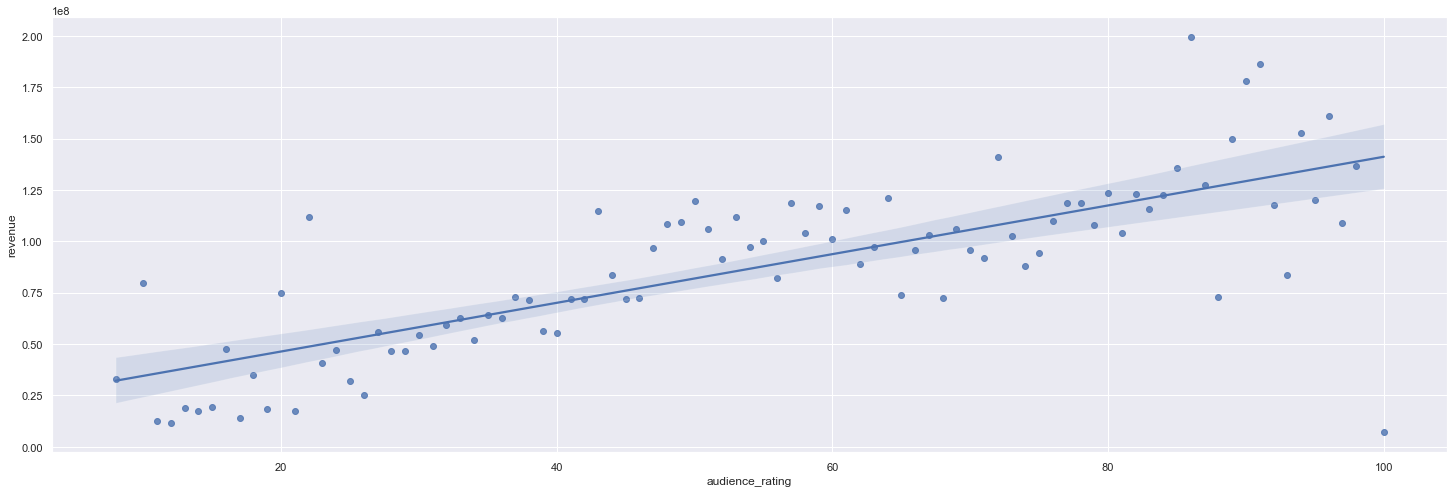

In [50]:
#group movies together by audience rating and take mean of their revenues
aud_rating = aud_rating.groupby(['audience_rating']).mean()
aud_rating = aud_rating.reset_index()
sns.regplot(x='audience_rating', y='revenue', data=aud_rating)

From the above graph, it is now evident that as audience rating increases, so does revenue! But how does this relationship compare of our other variables?

### Audience Count

Does a movie's Audience Count affect its revenue?
Let us answer this question by taking a look at our Audience Count variable.\
First let us take a look at some statistics on our working dataframe.

In [51]:
aud_count = df[['audience_count', 'revenue']]
aud_count.describe()

,audience_count,revenue
count,5.731000e+03,5.731000e+03
mean,4.095223e+05,9.915164e+07
std,3.025338e+06,1.844640e+08
min,5.000000e+00,1.000000e+00
25%,9.757500e+03,8.998401e+06
50%,4.247300e+04,3.441689e+07
75%,1.455085e+05,1.058673e+08
max,3.579764e+07,2.847246e+09


Next, let's take a look at a histogram of Audience Count to see its distribution.

<AxesSubplot:xlabel='audience_count', ylabel='Count'>

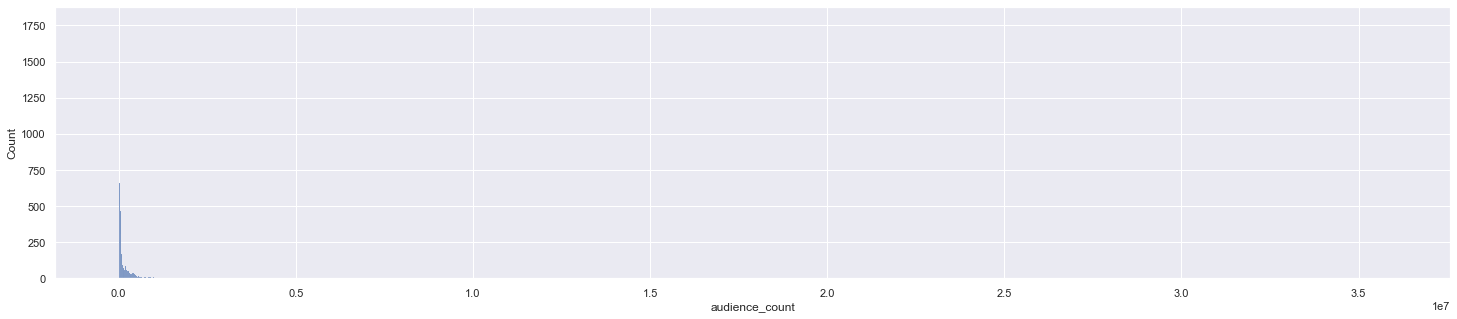

In [52]:
#display audience count in histogram
fig, ax1 = plt.subplots(figsize=(25,5))
sns.histplot(x='audience_count', data=aud_count)

Yikes! That's an unhelpful graph. We see that most of the values are heavily focused on the left side of the graph. Let's look at the boxplot to hopefully give us a better understanding of the distribution.

<AxesSubplot:xlabel='audience_count'>

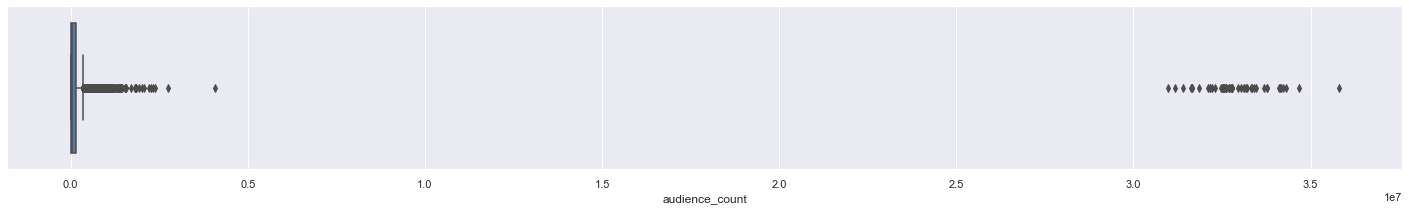

In [53]:
#display audience count in boxplot
fig, ax1 = plt.subplots(figsize=(25,3))
sns.boxplot(x='audience_count', data=aud_count)

From this boxplot we see that there are a great amount of high-end outliers, and that the audience count data seems to be split into 2 groups! Let's examine the relationship between audience count and revenue and then split the groups up and examine the relationship again.

<AxesSubplot:xlabel='audience_count', ylabel='revenue'>

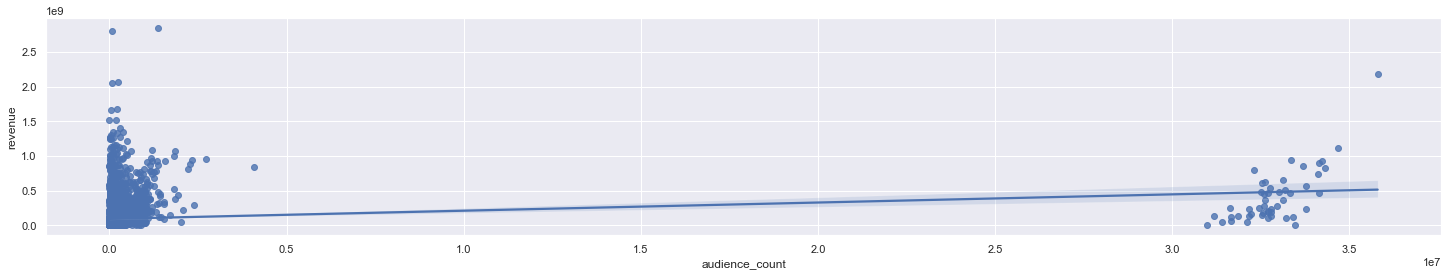

In [54]:
fig, ax1 = plt.subplots(figsize=(25,4))
sns.regplot(x='audience_count', y='revenue', data=aud_count)

While there seems to be a slight positive relationship between audience count and revenue, this graph is very helpful. Now let's split audience count into the two groups. We'll choose the value '20000000' as a threshold for splitting because it is inbetween the two groups.

In [55]:
#split audience count into lower and upper groups using 20000000 as the threshold
lower_aud_count = aud_count[aud_count['audience_count'] < 20000000]
upper_aud_count = aud_count[aud_count['audience_count'] >= 20000000]

Then, let's display the lower and upper audience counts in a histogram.

<AxesSubplot:xlabel='audience_count', ylabel='Count'>

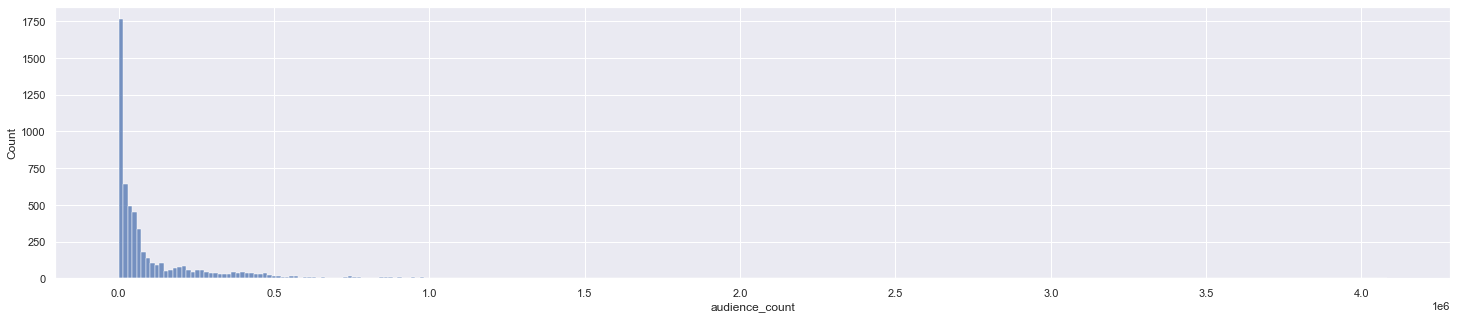

In [56]:
#display lower audience count
fig, ax1 = plt.subplots(figsize=(25,5))
sns.histplot(x='audience_count', data=lower_aud_count)

<AxesSubplot:xlabel='audience_count', ylabel='Count'>

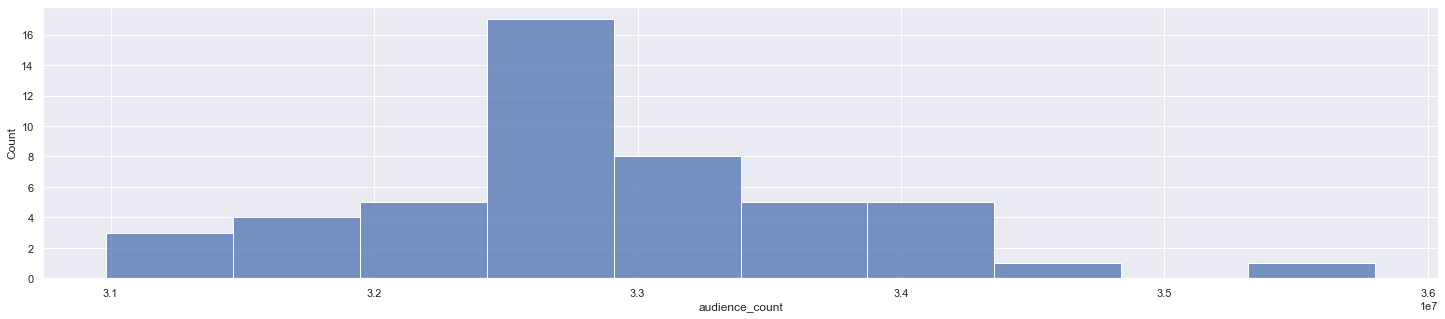

In [57]:
#display upper audience count
fig, ax1 = plt.subplots(figsize=(25,5))
sns.histplot(x='audience_count', data=upper_aud_count)

Now let's compare the relationships between the differing audience counts and revenue side-by-side.

[Text(0.5, 0, 'Audience Count'), Text(0, 0.5, 'Revenue')]

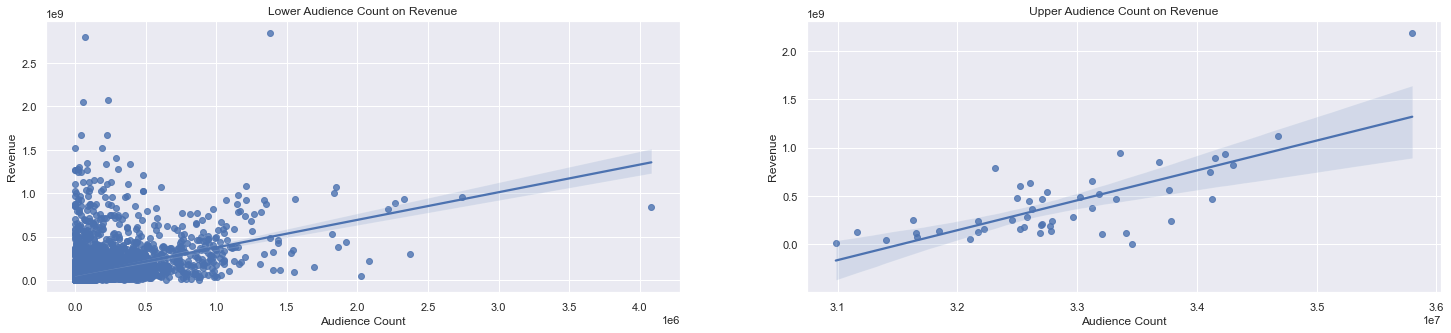

In [58]:
#display lower audience count vs revenue and upper audience count vs revenue
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))
sns.regplot(ax=ax1, x='audience_count', y='revenue', data=lower_aud_count)
ax1.set_title('Lower Audience Count on Revenue')
ax1.set(xlabel='Audience Count', ylabel='Revenue')

sns.regplot(ax=ax2, x='audience_count', y='revenue', data=upper_aud_count)
ax2.set_title('Upper Audience Count on Revenue')
ax2.set(xlabel='Audience Count', ylabel='Revenue')

While there seems to be a positive relationship between lower or upper audience count and revenue, it does not seem like the data is fit for a linear regression. Let's try removing outliers in audience count and revenue and see if this changes.

In [59]:
#remove high-end outliers from audience count and revenue
#calculate IQR and then upper_bound to remove outliers from audience count
aud_no_outliers = df_sub[['audience_count', 'revenue']]
Q1 = aud_no_outliers['audience_count'].quantile(0.25)
Q3 = aud_no_outliers['audience_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3, IQR, upper_bound)

8968.5 105371.5 96403.0 249976.0


In [60]:
#filter out high-end outliers from audience count and display statistics
aud_no_outliers = aud_count[aud_count['audience_count'] <= upper_bound]
aud_no_outliers.describe()

,audience_count,revenue
count,4743.000000,4.743000e+03
mean,49976.632300,7.187561e+07
std,58234.475812,1.544867e+08
min,5.000000,1.000000e+00
25%,7928.500000,6.197395e+06
50%,28024.000000,2.372679e+07
75%,65413.500000,7.084605e+07
max,249745.000000,2.797801e+09


Finally, let's display the relationship between audience count and revenue with and without outliers side-by-side.

[Text(0.5, 0, 'Audience Count'), Text(0, 0.5, 'Revenue')]

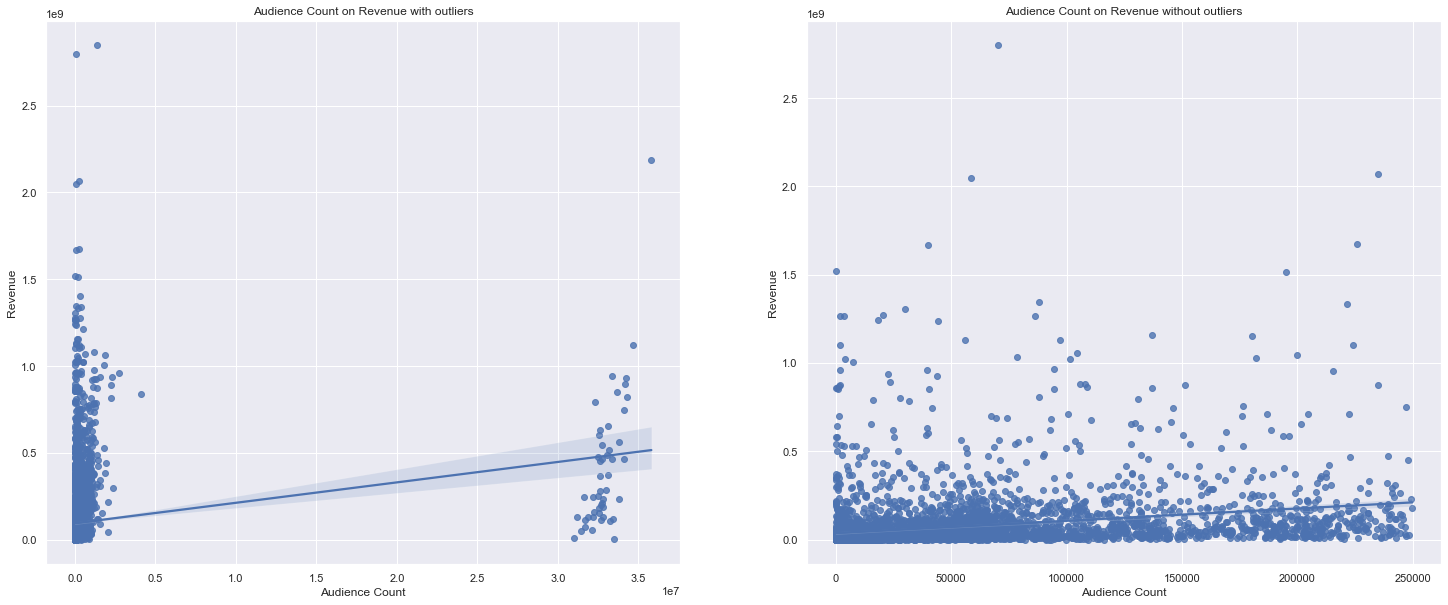

In [61]:
#display original Audience Count vs Revenue model with outliers and without outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.regplot(ax=ax1, x='audience_count', y='revenue', data=aud_count)
ax1.set_title('Audience Count on Revenue with outliers')
ax1.set(xlabel='Audience Count', ylabel='Revenue')

sns.regplot(ax=ax2, x='audience_count', y='revenue', data=aud_no_outliers)
ax2.set_title('Audience Count on Revenue without outliers')
ax2.set(xlabel='Audience Count', ylabel='Revenue')

While these plots look very different, neither seem to have a strong linear relationship. This means audience count is most likely not a good predictor of a movie's revenue.

### Budget

Does a movie's budget affect its revenue?
Let us answer this question by taking a look at our budget variable.\
First let us take a look at some statistics on our working dataframe.

In [62]:
budget = df[['budget', 'revenue']]
budget.describe()

,budget,revenue
count,5.731000e+03,5.731000e+03
mean,3.326932e+07,9.915164e+07
std,4.167692e+07,1.844640e+08
min,1.000000e+00,1.000000e+00
25%,7.000000e+06,8.998401e+06
50%,1.900000e+07,3.441689e+07
75%,4.000000e+07,1.058673e+08
max,3.800000e+08,2.847246e+09


Let's generate a histogram to see the distribution of our budget variable.

<AxesSubplot:xlabel='budget', ylabel='Count'>

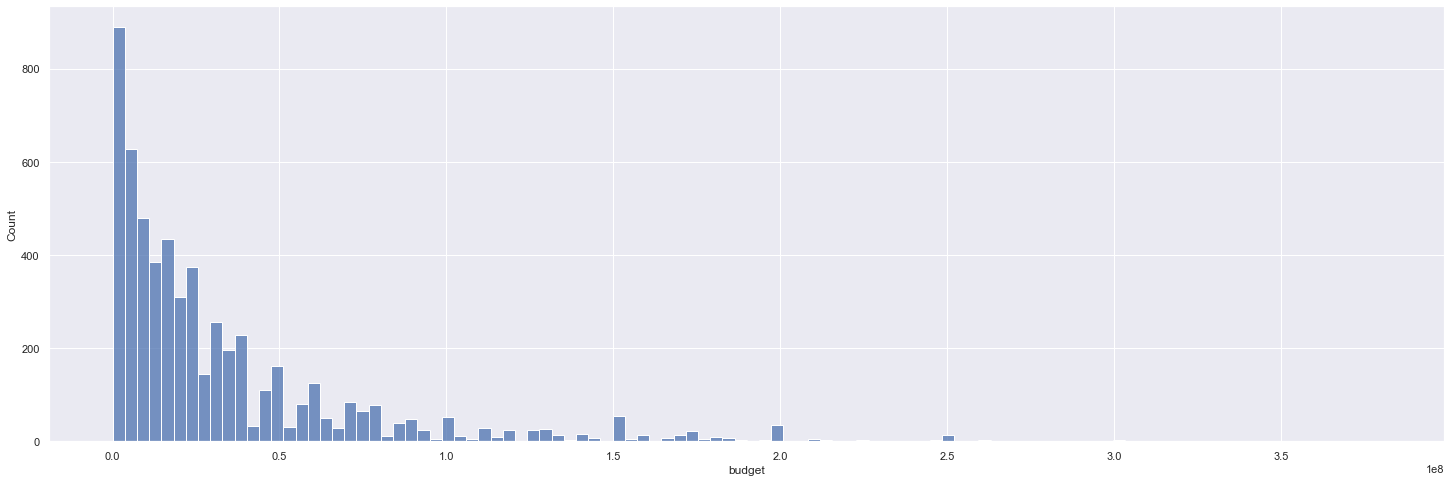

In [63]:
sns.histplot(x='budget', data=budget)

From the graph above we see that the majority of budget values lies on the left. Now let's see the relationship between budget and revenue.

<AxesSubplot:xlabel='budget', ylabel='revenue'>

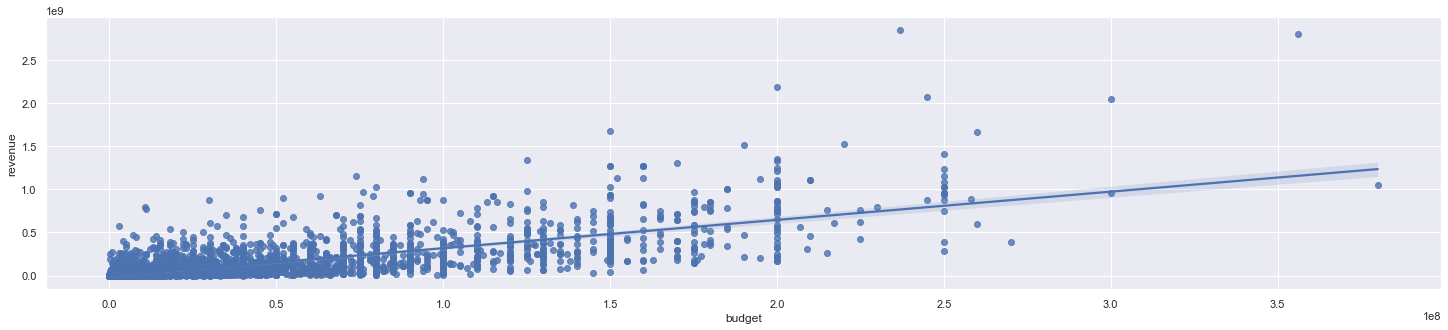

In [64]:
fig, ax1 = plt.subplots(figsize=(25,5))
sns.regplot(x='budget', y='revenue', data=budget)

We see that there is a positive relationship between budget and revenue. Generally, as a movie's budget increases, its revenue also increases. Like we did with the variables above, let's remove the outliers and see if this relationship sees a significant change. We generate a boxplot to see outliers in budget.

<AxesSubplot:xlabel='budget'>

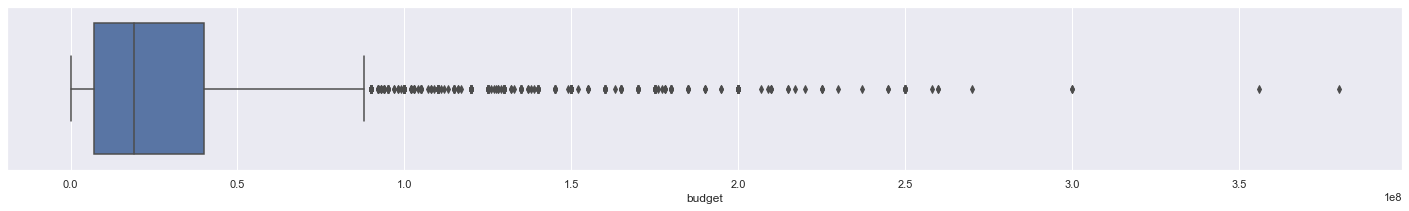

In [65]:
#display boxplot of budget
fig, ax1 = plt.subplots(figsize=(25,3))
sns.boxplot(x='budget', data=budget)

There are quite a lot of high-end outliers in budget. Let's calculate the IQR to remove these outliers.

In [66]:
#calculate IQR using quantiles
budget_no_outliers = df_sub[['budget', 'revenue']]
Q1 = budget_no_outliers['budget'].quantile(0.25)
Q3 = budget_no_outliers['budget'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(Q1, Q3, IQR, upper_bound)

6000000.0 35000000.0 29000000.0 78500000.0


Then we filter out the high-end outliers in budget.

In [67]:
#remove budgets above the upper bound
budget_no_outliers = budget_no_outliers[budget_no_outliers['budget'] <= upper_bound]

Furthermore, in an attempt to reduce the number of datapoints and therefore clutter, let's group movies with same budgets to form a single datapoint, and its revenue will be the mean of the grouped movies' revenues.

In [68]:
#group movies with same budget together
budget_no_outliers = budget_no_outliers.groupby(['budget']).mean()
budget_no_outliers = budget_no_outliers.reset_index()

Now we display the relationship between grouped budget with no outliers, original budget and revenue side-by-side.

[Text(0.5, 0, 'Budget'), Text(0, 0.5, 'Revenue')]

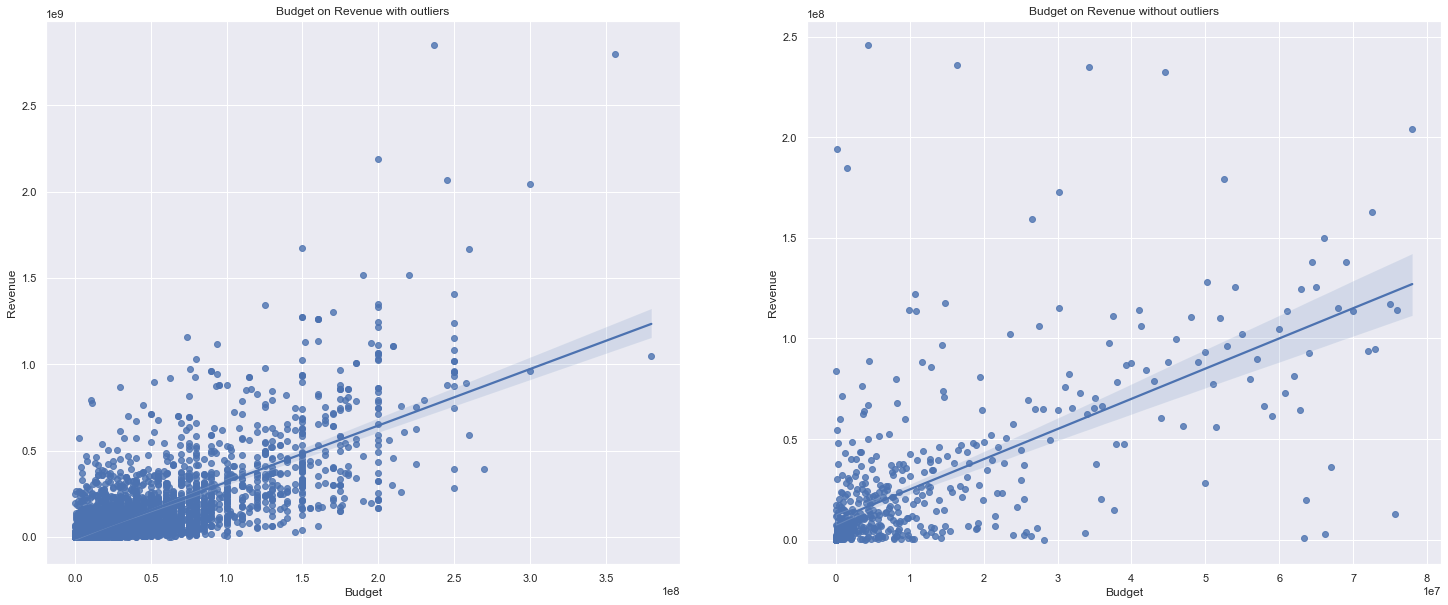

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
sns.regplot(ax=ax1, x='budget', y='revenue', data=budget)
ax1.set_title('Budget on Revenue with outliers')
ax1.set(xlabel='Budget', ylabel='Revenue')

sns.regplot(ax=ax2, x='budget', y='revenue', data=budget_no_outliers)
ax2.set_title('Budget on Revenue without outliers')
ax2.set(xlabel='Budget', ylabel='Revenue')

From the side-by-side graph, the relationship seems to be unchanged. While the graph without outliers certainly has less clutter, removing outliers and grouping the movies does not seem to make much difference. Furthermore, when we analyze the relationship between budget and revenue later we will be using outliers because each movie is significant.

### Different Types of Critics

#### Tomatometer Top Critics Count, Fresh Critics Count, and Rotten Critics Count

Now we will move on to examing how different types of critics can influence the revenue. We will be looking at tomatometer top critics count, fresh critics count, and rotten critics count.
We will first look at the data we have:

In [70]:
df[['tomatometer_top_critics_count','tomatometer_fresh_critics_count' , 'tomatometer_rotten_critics_count', 'revenue']].describe()

,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,revenue
count,5731.000000,5731.000000,5731.000000,5.731000e+03
mean,24.810504,63.666376,40.724132,9.915164e+07
std,17.426676,69.982982,39.928044,1.844640e+08
min,0.000000,0.000000,0.000000,1.000000e+00
25%,8.000000,15.000000,9.000000,8.998401e+06
50%,23.000000,39.000000,26.000000,3.441689e+07
75%,39.000000,88.000000,62.000000,1.058673e+08
max,69.000000,497.000000,303.000000,2.847246e+09


To get a better sense of the difference between the critics types, we generated histplot for each and found out that number of top critics are the smallest among all, and number of fresh critics happen to be the highest. 

<AxesSubplot:xlabel='tomatometer_rotten_critics_count', ylabel='Count'>

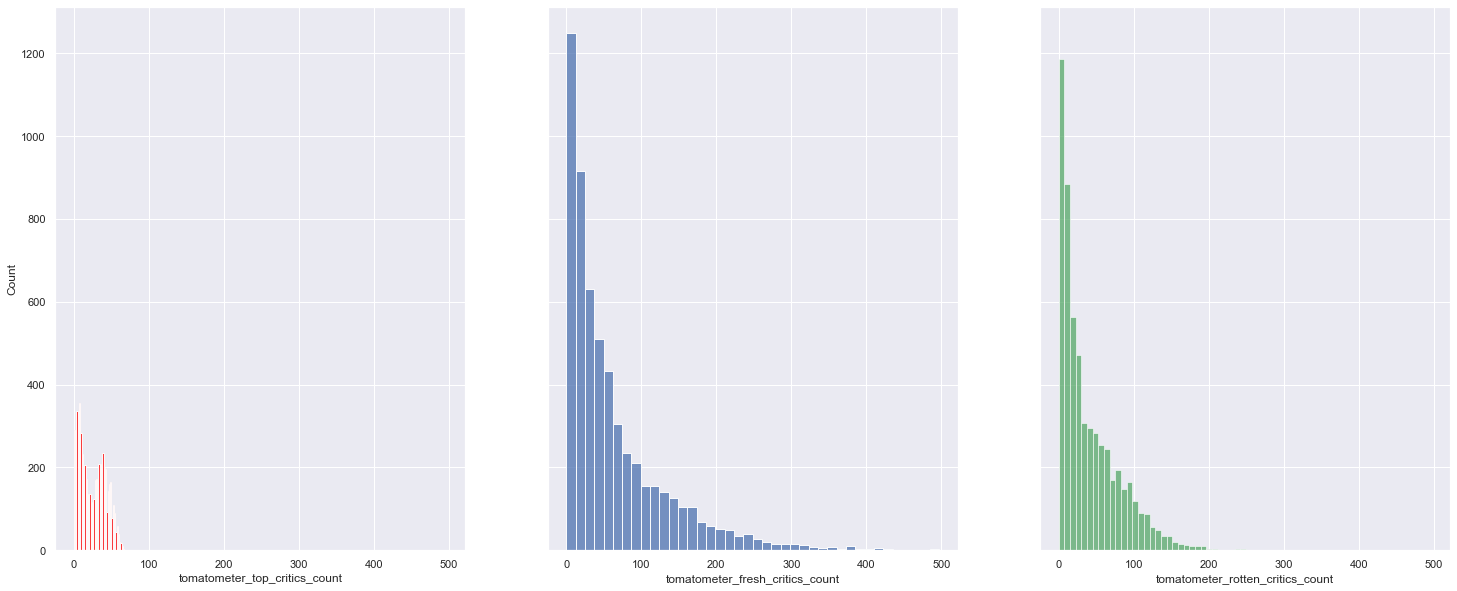

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(25, 10))
sns.histplot(df['tomatometer_top_critics_count'], ax=ax1, bins=40, color='red')
sns.histplot(df['tomatometer_fresh_critics_count'], ax=ax2, bins=40, color='b')
sns.histplot(df['tomatometer_rotten_critics_count'], ax=ax3, bins=40, color='g')

Since the variables are numeric, we will generate a regression plot between top critics and revenue, fresh critics and revenue, and rotten critics and revenue to look at the relationship for each 

<AxesSubplot:xlabel='tomatometer_rotten_critics_count', ylabel='revenue'>

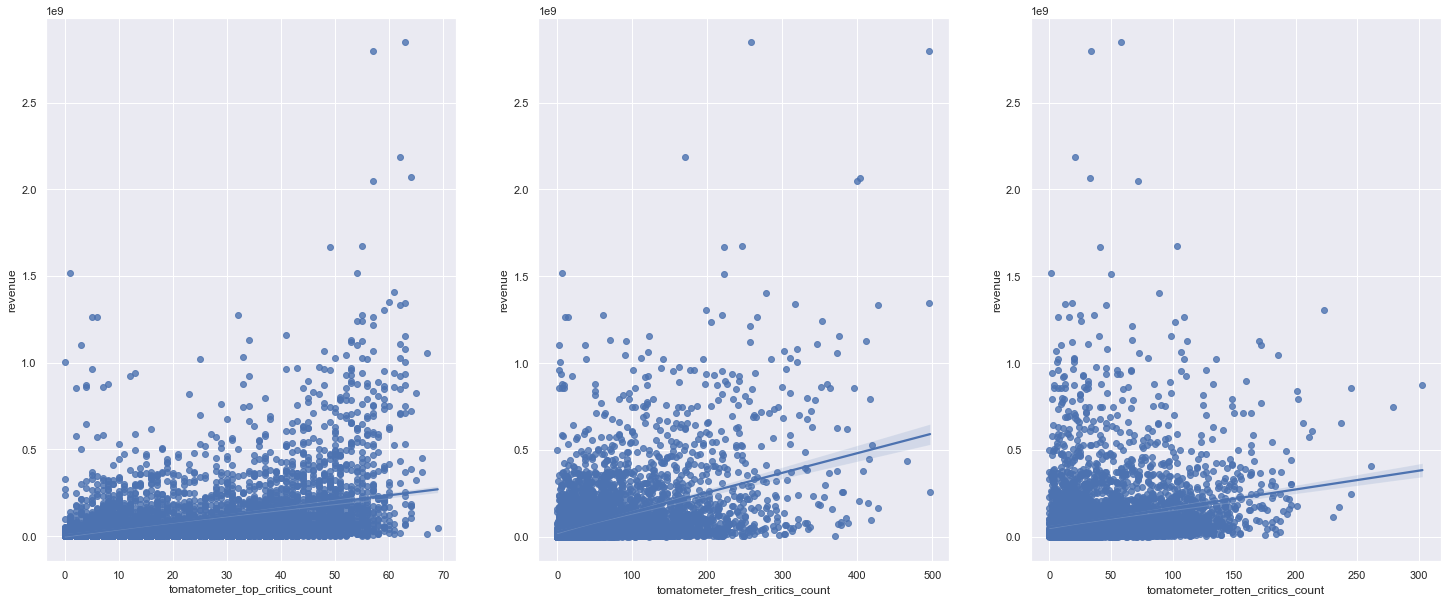

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(25, 10))
sns.regplot(x ='tomatometer_top_critics_count', y='revenue', data=df, ax=ax1)
sns.regplot(x ='tomatometer_fresh_critics_count', y='revenue', data=df, ax=ax2)
sns.regplot(x ='tomatometer_rotten_critics_count', y='revenue', data=df, ax=ax3)

There seems to be a postiive relationship for each plot! However, the plot still seems very clustered on its own. We will remove the outliers and see if it makes a difference. 

Let's first generate a box plot and see if there is any potential outfliers:

<AxesSubplot:xlabel='tomatometer_top_critics_count'>

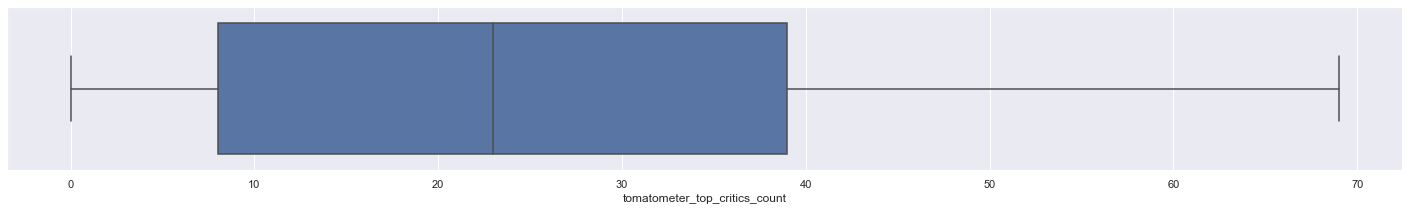

In [73]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.boxplot(x='tomatometer_top_critics_count', data=df)

<AxesSubplot:xlabel='tomatometer_fresh_critics_count'>

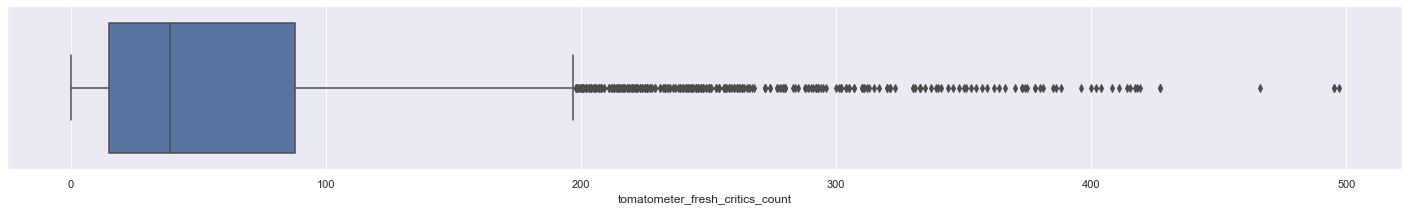

In [74]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.boxplot(x='tomatometer_fresh_critics_count', data=df)

<AxesSubplot:xlabel='tomatometer_rotten_critics_count'>

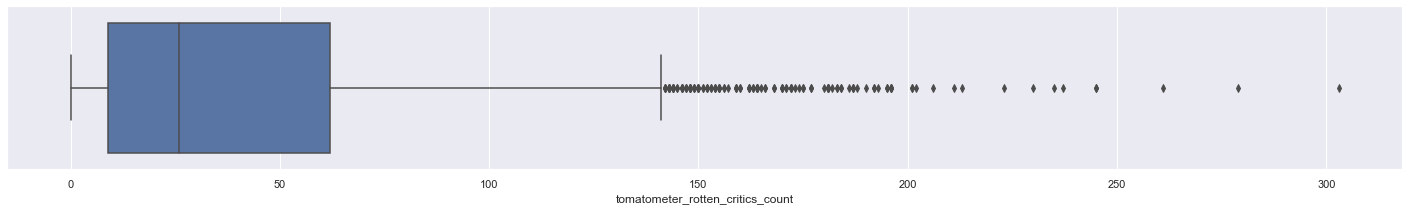

In [75]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.boxplot(x='tomatometer_rotten_critics_count', data=df)

From the box plots, we can tell there exists some outliers for tomatometer rotten critics count and fresh critics count. We will remove the outliers and see if it makes a difference on the regression trend.

We will first look at fresh critics count:

In [76]:
#this calculate the upper bound of the data
df_with_outlier_fresh= df[['tomatometer_fresh_critics_count', 'revenue']]
df_without_outlier_fresh = df_with_outlier_fresh
df_mean, df_std = mean(df_without_outlier_fresh['tomatometer_fresh_critics_count']), std(df_without_outlier_fresh['tomatometer_fresh_critics_count'])
upperbound = df_mean + 3 * df_std
print(upperbound)

273.59700518334154


In [77]:
#remove outliers above the upperbound
df_without_outlier_fresh = df_without_outlier_fresh[df_without_outlier_fresh['tomatometer_fresh_critics_count'] <= upperbound]
df_without_outlier_fresh

,tomatometer_fresh_critics_count,revenue
0,73,226497209
1,16,74865517
2,54,1000000
3,24,28200000
4,12,49483352
...,...,...
5725,18,169852759
5726,88,60780981
5727,51,55969000
5728,3,12506188


Text(0.5, 0, 'without outlier')

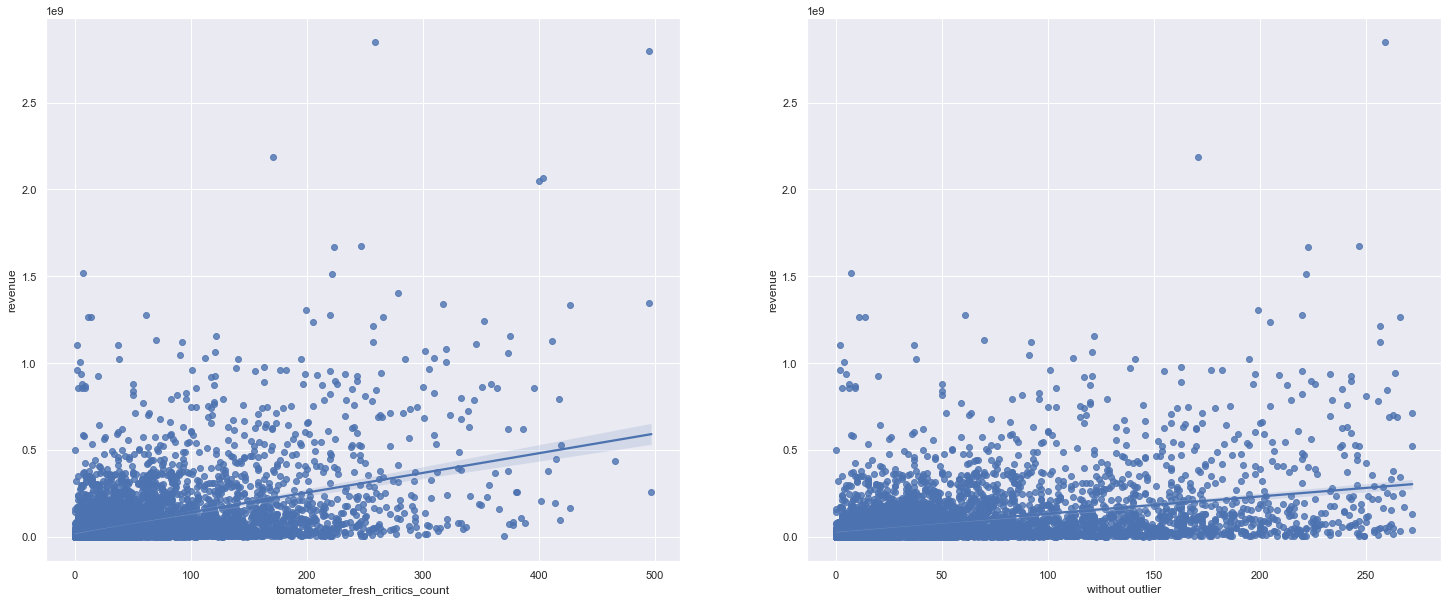

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 10))
sns.regplot(x ='tomatometer_fresh_critics_count', y='revenue', data=df, ax=ax1)
sns.regplot(x ='tomatometer_fresh_critics_count', y='revenue', data=df_without_outlier_fresh, ax=ax2)
plt.xlabel('without outlier')

From the plots, we can see that without outliers, there still exists a positive relationship between the tomatometer fresh critics count and revenue. However, the slope decreases when the outliers are removed, and the regression line is closer to a straight line. We will say there exists a positive yet weak correlation between the two variables.

Now we will move to rotten critics count and compare the plot with and without outliers:

In [79]:
df_with_outlier_rotten= df[['tomatometer_rotten_critics_count', 'revenue']]
df_without_outlier_rotten = df_with_outlier_rotten
df_mean, df_std = mean(df_without_outlier_rotten['tomatometer_rotten_critics_count']), std(df_without_outlier_rotten['tomatometer_rotten_critics_count'])
upperbound = df_mean + 3 * df_std
print(upperbound)

160.49781170125888


In [80]:
#remove outliers above the upperbound
df_without_outlier_rotten = df_without_outlier_rotten[df_without_outlier_rotten['tomatometer_rotten_critics_count'] <= upperbound]
df_without_outlier_rotten

,tomatometer_rotten_critics_count,revenue
0,76,226497209
1,8,74865517
2,0,1000000
3,3,28200000
4,3,49483352
...,...,...
5725,114,169852759
5726,50,60780981
5728,65,12506188
5729,7,1023784195


Text(0.5, 0, 'without outlier')

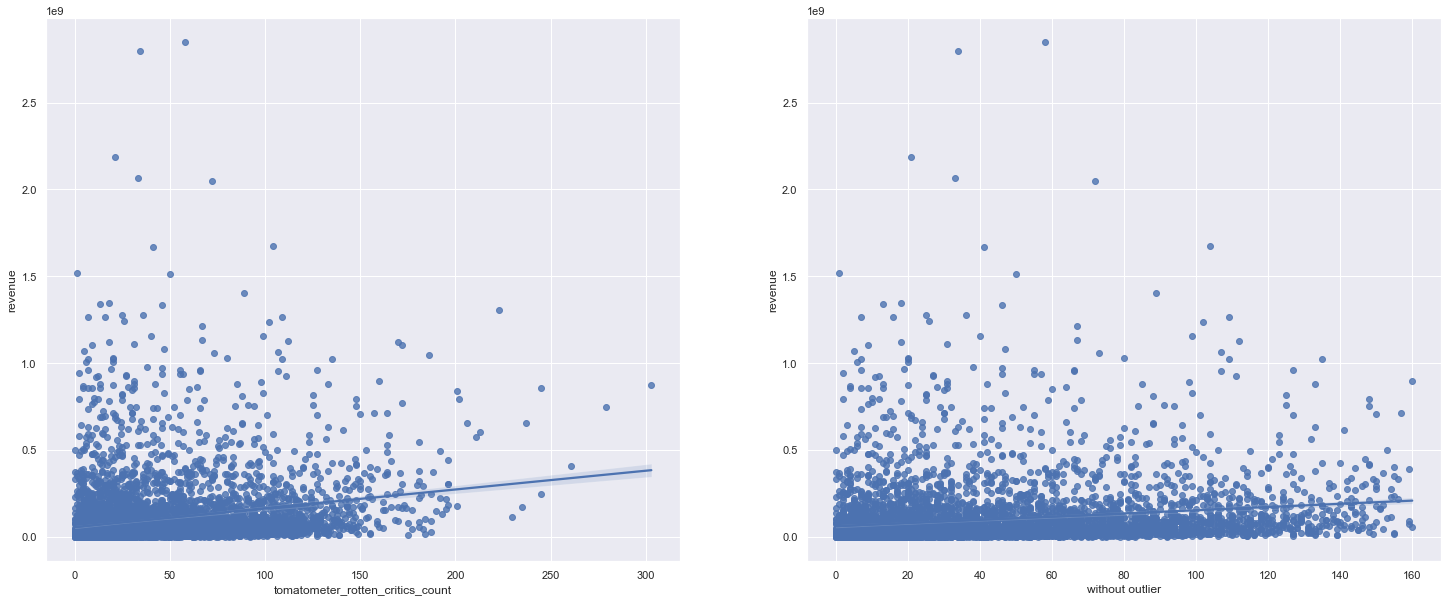

In [81]:
#compare plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 10))
sns.regplot(x ='tomatometer_rotten_critics_count', y='revenue', data=df, ax=ax1)
sns.regplot(x ='tomatometer_rotten_critics_count', y='revenue', data=df_without_outlier_rotten, ax=ax2)
plt.xlabel('without outlier')

We can see that without outliers, the slope of the plot is still postive, but closer to 0. For now, it seems like there does exist a positive relationship between rotten critics count and the revenue, but the correlation seems to be a bit weak. 

## Inferential Analysis

We will be using outliers in our regression analysis, as we believe every movie to be significant.

In [82]:
#input other for any other genre that appears only once
genre_greater = ['Action & Adventure', 'Drama', 'Comedy', 'Mystery & Suspense', 'Science Fiction & Fantasy', 'Horror', 'Kids & Family', 'Documentary']
df_all['genres'] = np.where(df_all['genres'].isin(genre_greater), df_all['genres'], 'Other')

In [83]:
#pop directors created
pop_directors = list(df_all['directors'].value_counts()[df_all['directors'].value_counts() > 1].index)
df_all['pop_directors'] = np.where(df_all['directors'].isin(pop_directors), 1, 0)

#pop authors created
pop_authors = list(df_all['authors'].value_counts()[df_all['authors'].value_counts() > 1].index)
df_all['pop_authors'] = np.where(df_all['authors'].isin(pop_authors), 1, 0)

#pop production company created
pop_production_company = list(df_all['production_company'].value_counts()[df_all['production_company'].value_counts() > 1].index)
df_all['pop_production_company'] = np.where(df_all['production_company'].isin(pop_production_company), 1, 0)

In [84]:
#create variable seasons based on original release date
season = []
for i in df_all['original_release_date']:
    month = int(i.split('-')[1])
    if month in [6, 7, 8]:
        season.append('Summer')
    elif month in [9,10,11]:
        season.append('Autumn')
    elif month in [12, 1, 2]:
        season.append('Winter')
    elif month in [3,4,5]:
        season.append('Spring')
df_all['Seasons'] = season

In [85]:
one_hot_CRating = pd.get_dummies(df_all['content_rating'])
one_hot_genres = pd.get_dummies(df_all['genres'])
one_hot_actors = pd.get_dummies(df_all['actors'])
one_hot_season = pd.get_dummies(df_all['Seasons'])

# Join the encoded df
df_all = df_all.join(one_hot_CRating)
df_all = df_all.join(one_hot_genres)
df_all = df_all.join(one_hot_actors)
df_all = df_all.join(one_hot_season)

In [86]:
#drop all columns transformed
df_all = df_all.drop('content_rating',axis = 1)
df_all = df_all.drop('genres',axis = 1)
df_all = df_all.drop('directors',axis = 1)
df_all = df_all.drop('authors',axis = 1)
df_all = df_all.drop('actors',axis = 1)
df_all = df_all.drop('original_release_date',axis = 1)
df_all = df_all.drop('production_company',axis = 1)
df_all = df_all.drop('Seasons',axis = 1)
df_all = df_all.drop('rotten_tomatoes_link',axis = 1)
df_all = df_all.drop('movie_title',axis = 1)

In [87]:
# linear regression model for audience count and revenue
mod = sm.OLS(df_all['revenue'], df_all.loc[:, df_all.columns != 'revenue'])
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:25:54   Log-Likelihood:                -47357.
No. Observations:                2415   AIC:                         9.479e+04
Df Residuals:                    2378   BIC:                         9.500e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
runtime 

### Analysis
For each variable we explain the linear regression above and use a standard p value of .05 as a threshold for statistical significance.

##### Runtime
Runtime in the linear regression had a coefficient of -3.638e+05 which would mean that for every minute of increase in runtime revenue decreased by -3.648e+05. This was statistically significant with a p-value of .011 however the coefficient is very small.

##### Production Company
For production company in order to use it in the linear regression a binary variable was added to indicate whether or not a production company appeared more than once in the dataset as a signal of its popularity. The coefficient of pop_production_company is -1.857e+07 which would mean that if it was considered a popular production company then the revenue would decrease by -1.857e+07. This was not statistically significant with a p value of 0.148.

##### Tomatometer Rating
For tomatometer_rating the coefficient is -1.107e+06 and is statistically significant which would mean that revenue would decrease for every increase in tomatometer_rating by 1.

#### Content rating
For content rating, the genre with the highest positive impact on revenue is G, which has a coefficient of 7.485e+07. The P value is 0.002, which means that this is statistically significant. We can interpret this as if a movie is G rated, it will increase the predicted revenue by 7.485e+07.

#### Genre
The genre with the highest positive effect on revenue is Science Fiction and Fantasy, which has a coefficient of 7.333e+07. It has a P value of 0.000, so it is statistically significant. So if a movie is in the Science Fiction and Fantasy genre, then it will increase the predicted revenue by 7.333e+07.

#### Directors
We can see that the coefficient for the top directors is 3.071e+07. This has a P value of 0.000, so it is statistically significant, so we can say that if a movie is directed by a popular director, it will increase the predicted revenue by 3.071e+07.

#### Authors
For authors, in order to use it in the linear regression a binary variable was added to indicate whether or not an author appeared more than once in the dataset as a signal of its popularity. The coefficient pop_authors is 3.153e+07 which would mean that if it was a popular author, then the revenue would increase by 3.153e+07. We found that the authors were statistically significant with a p-value of 0.015

#### Actors
For actors, we found that the actor with the highest impact on revenue was Steve Buscemi with a coefficient of 7.367e+06. He has a p value of 0.523 thus, he is not statistically significant.

#### Original Release Date
For Original Release Date, in order to use it in the linear regression four binary variables were added to categorize the variable into four distinct season categories. The coefficient for Autumn and Winter had a negative coefficient indicating that there was a decrease in revenue while Spring and Summer had a positive coefficient indicating an increase in Revenue. We found that Autumn and Spring were the only two seasons that are statistically significant with a p value of 0.038 for Autumn and 0.001 for Spring.

#### Tomatometer Count
From our inferential analysis we found that the Beta coefficient for Tomatometer Count was -6.706e+07, with a statistically significant p-value of 0.000. This means that for every one unit increase in Tomatometer Count, a movie's revenue tended to decrease by $67,060,000! Not what we would have expected.

#### Audience Count
Inferential analysis on audience count vs revenue told us that for every additional audience member a movie got, its revenue increased by $8.0921 with a statistically significant p-value of 0.000. We believe an explanation for this is the mean price of a movie ticket. Obviously, as a movie's audience count increases its revenue will increase. However the amount it increases, in our case $8.0921, could just be the mean price of a movie ticket around the world.

#### Audience Rating
We found that the beta coefficient for audience rating was 1.882e+06 with a statistically significant p-value of 0.000, meaning for every additional 1% rating a movie got on Rotten Tomatoes, its revenue would increase by $1,822,000.

#### Budget
After analyzing budget in our inferential analysis, we found a beta coefficient of 2.3453 and a p-value of 0.000. This meant for every additional dollar the production company of a movie spent on its budget, it would increase its revenue by $2.3453. It's like printing money!

#### Tomatometer Top Critics Count
For top critics count, the coefficient from the inferential analysis is -1.139e+06 and the P value is 0. This means that there exists an inverse relationship between top critics count and revenue and it is statistically significant, although the coefficient is very small.
#### Tomatometer Fresh Critics Count
The coefficient for freh critics count is 6.757e+07 and p value is 0, which means that the more the counts of the fresh critics, the more the revenue. It appears that the relationship between fresh critics count and revenue is postive and statistically significant.
#### Tomatometer Rotten Critics Count
The coefficient for rotten critics count is 6.663e+07 and p value is 0. This means that there exists a direct relationship between rotten critics count and revenue, and it is statistically significant. 

# Ethics & Privacy

Our dataset includes 5371 observations. While this is a substantial amount of datapoints, our dataset does not contain every movie ever made. The 5371 datapoints were created by the merging of two datasets from Kaggle and The Movie Database, and many movies were left out because the names did not match on both datasets or one dataset contained information about a certain movie that the other did not. A potential bias that may exist in our dataset comes from how the datasets we merged were produced. Since we do not know the methodolgy behind the creation of the Kaggle Rotten Tomatoes dataset, there could be ways biases were included, but we assume that Kaggle is a credible website when creating our dataset. For The Movie Database dataset, even though our group was the one to generate the dataset from the website's API, there could be false values in the database that we are unaware of that leads to biases. In regards to privacy concerns, our data contains no private information. Any names related to a movie, for example actor names and actor names, is already publicly available information on the Rotten Tomatoes website or just from Googling the movie.

A potential ethics problem arises based on the result of our project. Our project could push movie companies to make only certain types of movies that we find profitable in our project and stop making movies that generate lower revenue which can isolate and hurt smaller niche movie watchers. Furthermore, this could push movie companies to only release movies during the most profitable seasons. This is similar to the ethics problem of video recommedation systems when the recommendation algorithm shows us only popular videos so smaller creators go unnoticed. To some extent, these types of problems already exist in Hollywood. Movie companies tend to only hire actors and actresses with larger resumes and more fame in comparison to newer and smaller actors and actresses, which stunts their growth.

# Conclusion & Discussion

In this project, we tried to find which variables would be correlated with increased movie revenue. We predicted that higher Tomatometer rating and budget resulted in higher revenue. Out of the categorical variables, we predicted that PG-13 ratings and being in the Action & Adventure genre would increase the revenue of movies. Additionally, we predicted that more popular actors and directors would also increase a movie’s revenue. In our dataset, in addition to the aforementioned variables, we took a look at authors, original release date, runtime, production company, Tomatometer count, audience rating, audience count, tomatometer top critics, tomatometer fresh critics, and tomatometer rotten critics count to see if there was a possible better predictor of increased variables and also to account for confounding variables. Our dataset contained a list of movies that we got from The Movie Database and Kaggle, and we matched up each movie with its data from Rotten Tomatoes.

We ran a linear regression on the variables and found that certain factors showed a significant correlation with higher revenue. These factors were having a G content rating (coefficient of 7.485e+07, P-value = 0.002), being in the Sci-Fi and Fantasy Genre(coefficient of 7.333e+07, P-value - 0.000), having a popular director (coefficient of 3.071e+07, P value of 0.000), being released in the Spring(coefficient of 2.653e+07, P-value=0.001), having a higher budget(coefficient of 2.3453, P-value = 0.000), having more Tomatometer Fresh Critics(Coefficient of 6.757e+07, P-value = 0.000).

Some limitations of our project was that our dataset size was limited to the source Rotten Tomatoes dataset. Due to this, we were not able to include every movie. We also had to filter out a lot of older and harder to find movies because they were missing a lot of the data we were looking for. We believe that our findings might incentivize companies to make certain types of movies that we found were correlated with increased revenue. On the other hand, we could also incentivize movie makers to avoid certain types as well. Our findings might also help with marketing certain aspects of movies to the public. Production companies might want to hire certain actors and directors or produce movies during certain seasons.


# Team Contributions

Michael Poon - Retrieving and matching datasets, Analysis, Data Cleaning, Responsible for 
certain variables(runtime, tomatometer_rating, production_company) in EDA and Analysis, 

Jeffrey Chen - Completed EDA for content rating, genre, and directors. Wrote analysis of regression for content rating, genre, and directors. Worked on the slide and video segment for the conclusion.

Brian Chen - Prior Work & Background research, Ethics & Privacy section, EDA and analysis for tomatometer rating, audience count, audience rating, and budget. Responsible for data + data cleaning slides and video part 

Reyna Yang - Completed EDA for Tomatometer Top, fresh, and rotten critics count; Worked on the slides for EDA in final presentation. 

Isabelle Chyun - Completed EDA for variables Author, Actor, and Original Release Date; Wrote summary for variables Author, Actor, and Original Release Date in Inferential Analysis; Completed Overview; completed video presentation.